# Simple Linear Regression Modeling

## A tale of two variables

### 1. A tale of two variables

Hi, my name is Maarten and welcome to the course. You will be learning about regression, a statistical tool to analyze the relationships between variables. Let's start with an example.

### 2. Swedish motor insurance data

This dataset on Swedish motor insurance claims is as simple as it gets. Each row represents a region in Sweden, and the two variables are the number of claims made in that region, and the total payment made by the insurance company for those claims, in Swedish krona.

In [1]:
import pandas as pd

In [2]:
swedish_motor_insurance = pd.read_csv('https://query.data.world/s/4q5uryajwpgeqfwz2d4bc3ffnfqp6h',names=["n_claims","total_payment_sek"])
swedish_motor_insurance.head()

,n_claims,total_payment_sek
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


### 3. Descriptive statistics

This course assumes you have experience with calculating descriptive statistics on variables in a DataFrame. For example, calculating the mean of each variable. We can use pandas for this, as shown here. The course also assumes you understand the correlation between two variables. Here, the correlation is 0 point nine one, a strong positive correlation. That means that as the number of claims increases, the total payment typically increases as well.

In [3]:
swedish_motor_insurance.mean()

n_claims             22.904762
total_payment_sek    98.187302
dtype: float64

In [4]:
swedish_motor_insurance.corr()

,n_claims,total_payment_sek
n_claims,1.000000,0.912878
total_payment_sek,0.912878,1.000000


### 4. What is regression?

Regression models are a class of statistical models that let you explore the relationship between a response variable and some explanatory variables. That is, given some explanatory variables, you can make predictions about the value of the response variable. In the insurance dataset, if you know the number of claims made in a region, you can predict the amount that the insurance company has to pay out. That lets you do thought experiments like asking how much the company would need to pay if the number of claims increased to two hundred.

### 5. Jargon

The response variable, the one you want to make predictions on, is also known as the dependent variable or the y variable. These two terms are completely interchangeable. Explanatory variables, used to explain how the predictions will change, are also known as independent variables or x variables. Again, these terms are interchangeable.

### 6. Linear regression and logistic regression

In this course we're going to look at two types of regression. Linear regression is used when the response variable is numeric, like in the motor insurance dataset. Logistic regression is used when the response variable is logical. That is, it takes True or False values. We'll limit the scope further to only consider simple linear regression and simple logistic regression. This means you only have a single explanatory variable.

### 7. Visualizing pairs of variables

Before you start running regression models, it's a good idea to visualize your dataset. To visualize the relationship between two numeric variables, you can use a scatter plot. The course assumes that your data visualization skills are strong enough that you can understand the seaborn code written here. If not, try taking one of DataCamp's courses on seaborn before you begin this course. On the plot, you can see that the total payment increases as the number of claims increases. It would be nice to be able to describe this increase more precisely.

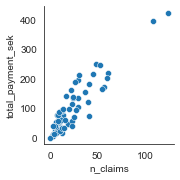

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

sns.pairplot(data=swedish_motor_insurance,diag_kind="hist",
             x_vars=["n_claims"],
             y_vars=["total_payment_sek"])
plt.show()

### 8. Adding a linear trend line

One refinement we can make is to add a trend line to the scatter plot. A trend line means fitting a line that follows the data points. In seaborn, trend lines are drawn using the regplot() function, which adds a trend line calculated using linear regression. By default, regplot() adds a confidence interval around the line, which we can remove by setting the ci argument to None. The trend line is mostly quite close to the data points, so we can say that the linear regression is a reasonable fit.

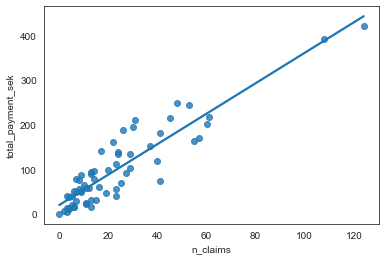

In [6]:
sns.regplot(x="n_claims",y="total_payment_sek",
            data=swedish_motor_insurance,ci=None)
plt.show()

### 9. Course flow

Here's the plan for the course. First, we'll visualize and fit linear regressions. Then we'll make predictions with them. Thirdly, we'll look at ways of quantifying whether or not the model is a good fit. In the final chapter, we'll run through this flow again using logistic regression models.

### 10. Python packages for regression

Before we dive into the first exercise, a word on Python packages for regression. Both statsmodels and scikit-learn can be used. However, statsmodels is more optimized for insight, whereas scikit-learn is more optimized for prediction. Since we'll focus on insight, we'll be using statsmodels in this course.

### 11. Let's practice!

Let's get started.

## Visualizing two numeric variables


<p>Before you can run any statistical models, it's usually a good idea to visualize your dataset. Here, you'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.</p>
<p>One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.</p>
<p><code>taiwan_real_estate</code> is available as a <code>pandas</code> DataFrame.</p>

In [7]:
import pandas as pd

In [8]:
taiwan_real_estate = pd.read_csv("data/taiwan_real_estate2.csv")
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


Import the <code>seaborn</code> package, aliased as <code>sns</code>.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Using <code>taiwan_real_estate</code>, draw a scatter plot of <code>"price_twd_msq"</code> (y-axis) versus <code>"n_convenience"</code> (x-axis).

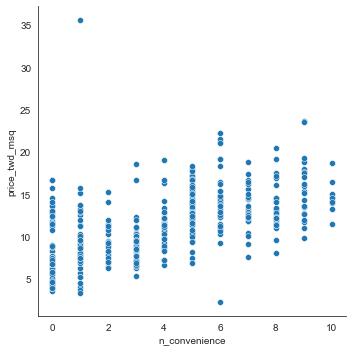

In [10]:
sns.relplot(data=taiwan_real_estate,kind="scatter",y="price_twd_msq",
            x="n_convenience")
plt.show()

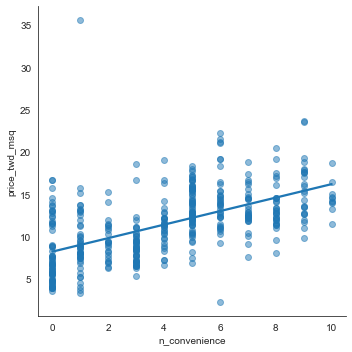

In [11]:
sns.lmplot(data=taiwan_real_estate,
           y="price_twd_msq",
           x="n_convenience",
           ci=None,
           scatter_kws={"alpha":0.5})
plt.show()

## Fitting a linear regression

### 1. Fitting a linear regression

You may have noticed that the linear regression trend lines in the scatter plots were straight lines. That's a defining feature of a linear regression.

### 2. Straight lines are defined by two things

Straight lines are completely defined by two properties. The intercept is the y value when x is zero. The slope is the steepness of the line, equal to the amount y increases if you increase x by one. The equation for a straight line is that the y value is the intercept plus the slope times the x value.

### 3. Estimating the intercept

Here's the trend line from the Swedish insurance dataset. Let's try to estimate the intercept.

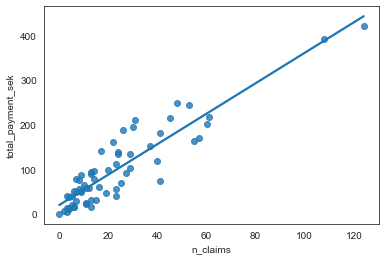

In [12]:
sns.regplot(data=swedish_motor_insurance,x="n_claims",
            y="total_payment_sek",ci=None)
plt.show()

### 4. Estimating the intercept

To find the intercept, look at where the trend line intersects the y axis.

### 5. Estimating the intercept

Its less than half way to the fifty mark, so I'd guess it's about twenty.

### 6. Estimating the slope

To estimate the slope, we need two points. To make the guessing easier, I've chosen points where the line is close to the gridlines.

### 7. Estimating the slope

First, we calculate the change in y values between the points. One y value is about four hundred and the other is about one hundred and fifty, so the difference is two hundred and fifty.

### 8. Estimating the slope

Now we do the same for the x axis. One point is at one hundred and ten, the other at forty. So the difference is seventy.

### 9. Estimating the slope

To estimate the slope we divide one number by the other. Two hundred and fifty divided by seventy is about three point five, so that is our estimate for the slope. Let's run a linear regression to check our guess.

<br>
<img src="image/img.png">

### 10. Running a model

To run a linear regression model, you import the ols function from statsmodels dot formula dot api. OLS stands for ordinary least squares, which is a type of regression, and is commonly used. The function ols takes two arguments. The first argument is a formula: the response variable is written to the left of the tilde, and the explanatory variable is written to the right. The data argument takes the DataFrame containing the variables. To actually fit the model, you add the dot fit() method to your freshly created model object. When you print the resulting model, it's helpful to use the params attribute, which contains the model's parameters. This will result in two coefficients. These coefficients are the intercept and slope of the straight line. It seems our guesses were pretty close. The intercept is very close to our estimate of twenty. The slope, indicated here as n_claims, is three point four, slightly lower than what we guessed.

In [13]:
from statsmodels.formula.api import ols

mdl_payment_vs_claims = ols("total_payment_sek ~ n_claims",
                           data=swedish_motor_insurance).fit()
mdl_payment_vs_claims.params

Intercept    19.994486
n_claims      3.413824
dtype: float64

### 11. Interpreting the model coefficients

That means that we expect the total payment to be twenty plus three point four times the number of claims. So for every additional claim, we expect the total payment to increase by three point four.

### 12. Let's practice!

Time to fit some models.

## Linear regression with ols()


<p>While <code>sns.regplot()</code> can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables. That means that sometimes you'll need to run a linear regression yourself.</p>
<p>Time to run your first model!</p>
<p><code>taiwan_real_estate</code> is available. <em>TWD</em> is an abbreviation for Taiwan dollars.</p>
<p>In addition, <strong>for this exercise and the remainder of the course</strong>, the following packages will be imported and aliased if necessary:
<code>matplotlib.pyplot</code> as <code>plt</code>, <code>seaborn</code> as <code>sns</code>, and <code>pandas</code> as <code>pd</code>.</p>

Import the <code>ols()</code> function from the <code>statsmodels.formula.api</code> package.

In [14]:
# Import the ols function
from statsmodels.formula.api import ols

Run a linear regression with <code>price_twd_msq</code> as the response variable, <code>n_convenience</code> as the explanatory variable, and <code>taiwan_real_estate</code> as the dataset. Name it <code>mdl_price_vs_conv</code>.

In [15]:

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

Fit the model.

In [16]:

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

Print the parameters of the fitted model.

In [17]:

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


## Categorical explanatory variables

### 1. Categorical explanatory variables

So far we looked at running a linear regression using a numeric explanatory variable. Now let's look at what happens with a categorical explanatory variable.

### 2. Fish dataset

Let's take a look at some data on the masses of fish sold at a fish market. Each row of data contains the species of a fish, and its mass. The mass will be the response variable.

In [18]:
fish = pd.read_csv("data/fish.csv")
fish.sample(5)

,species,mass_g,length_cm
41,Roach,110.0,19.1
67,Perch,125.0,19.0
109,Perch,1000.0,40.2
95,Perch,685.0,34.0
59,Perch,70.0,15.7


### 3. Visualizing 1 numeric and 1 categorical variable

To visualize the data, scatter plots aren't ideal because species is categorical. Instead, we can draw a histogram for each of the species. To give a separate panel to each species, I use seaborn's displot function. This takes a DataFrame as the data argument, the variable of interest as x, and the variable you want to split on as col. It also takes an optional col_wrap argument to specify the number of plots per row. Because the dataset is fairly small, I also set the bins argument to nine. By default, displot creates histograms.

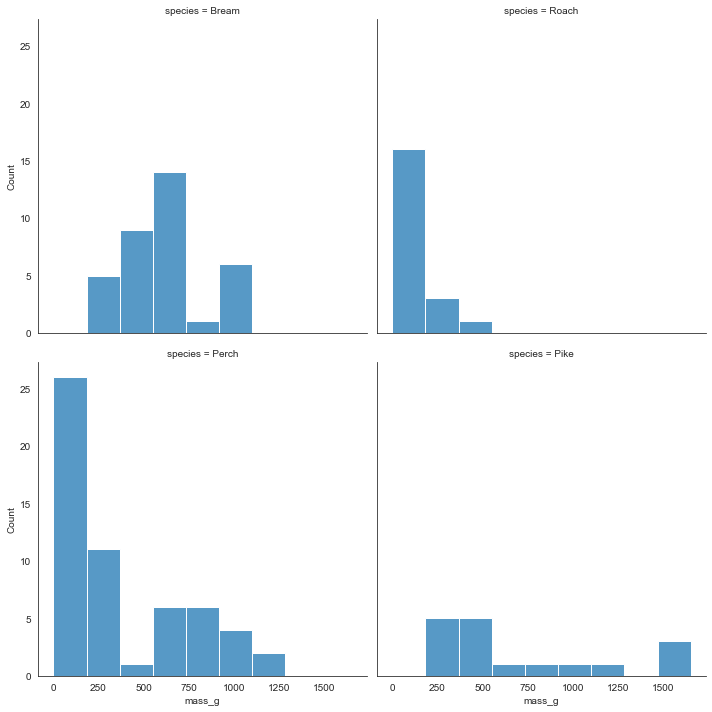

In [19]:
sns.displot(data=fish,
            x="mass_g",
            col="species",
            col_wrap=2,bins=9)

### 4. Summary statistics: mean mass by species

Let's calculate some summary statistics. First we group by species, then we calculate their mean masses. You can see that the mean mass of a bream is six hundred and eighteen grams. The mean mass for a perch is three hundred and eighty two grams, and so on.

In [20]:
summary_stats = fish.groupby("species")["mass_g"].mean()
summary_stats

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64

### 5. Linear regression

Let's run a linear regression using mass as the response variable and species as the explanatory variable. The syntax is the same: you call ols(), passing a formula with the response variable on the left and the explanatory variable on the right, and setting the data argument to the DataFrame. We fit the model using the fit method, and retrieve the parameters using dot params on the fitted model. This time we have four coefficients: an intercept, and one for three of the fish species. A coefficient for bream is missing, but the number for the intercept looks familiar. The intercept is the mean mass of the bream that you just calculated. You might wonder what the other coefficients are, and why perch has a negative coefficient, since fish masses can't be negative.

In [21]:
mdl_mass_vs_species = ols("mass_g ~ species",data = fish).fit()
mdl_mass_vs_species.params

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64

### 6. Model with or without an intercept

The coefficients for each category are calculated relative to the intercept. This way of displaying results can be useful for models with multiple explanatory variables, but for simple linear regression, it's just confusing. Fortunately, we can fix it. By changing the formula slightly to append "plus zero", we specify that all the coefficients should be given relative to zero. Equivalently, it means we are fitting a linear regression without an intercept term. If you subtract two hundred and thirty five point fifty-nine from six hundred and seventeen point eighty-three, you get three hundred and eighty two point twenty four, which is the mean mass of a perch. Now these coefficients make more sense. They are all just the mean masses for each species. This is a reassuringly boring result. When you only have a single, categorical explanatory variable, the linear regression coefficients are simply the means of each category.

In [22]:
mdl_mass_vs_species = ols("mass_g ~ species + 0 ",data=fish).fit()
mdl_mass_vs_species.params

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64

### 7. Let's practice!

Time for you to try it.

## Visualizing numeric vs. categorical


<p>If the explanatory variable is categorical, the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.</p>
<p>The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.</p>
<p><code>taiwan_real_estate</code> is available.</p>

Using <code>taiwan_real_estate</code>, plot a histogram of <code>price_twd_msq</code> with <code>10</code> bins. Split the plot by <code>house_age_years</code> to give 3 panels.

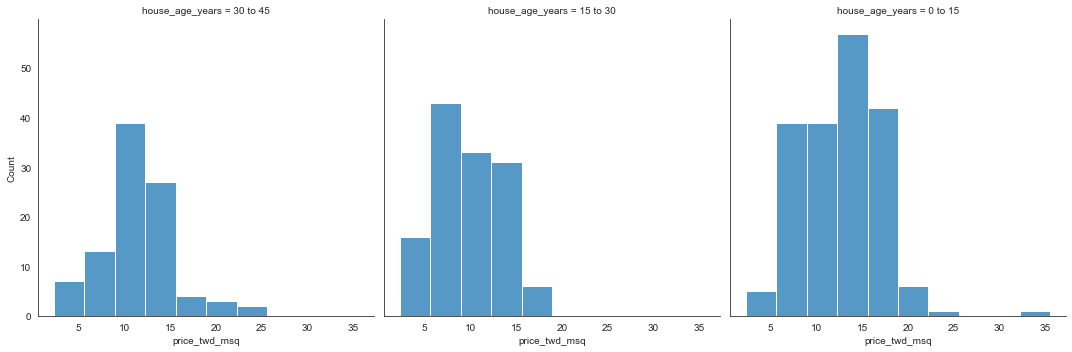

In [23]:
sns.displot(data=taiwan_real_estate,x="price_twd_msq",
            col="house_age_years",
            kind="hist",
            bins=10)
plt.show()

## Calculating means by category


<p>A good way to explore categorical variables further is to calculate summary statistics for each category.
For example, you can calculate the mean and median of your response variable, grouped by a categorical variable. As such, you can compare each category in more detail. </p>
<p>Here, you'll look at grouped means for the house prices in the Taiwan real estate dataset. This will help you understand the output of a linear regression with a categorical variable.</p>
<p><code>taiwan_real_estate</code> is available as a <code>pandas</code> DataFrame.</p>

Group <code>taiwan_real_estate</code> by <code>house_age_years</code> and calculate the mean price (<code>price_twd_msq</code>) for each age group. Assign the result to <code>mean_price_by_age</code>.

In [24]:
mean_price__by_age = taiwan_real_estate.groupby("house_age_years")["price_twd_msq"].mean()

Print the result and inspect the output.

In [25]:
mean_price__by_age

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64

## Linear regression with a categorical explanatory variable


<p>Great job calculating those grouped means! As mentioned in the last video, the means of each category will also be the coefficients of a linear regression model with one categorical variable. You'll prove that in this exercise.</p>
<p>To run a linear regression model with categorical explanatory variables, you can use the same code as with numeric explanatory variables. The coefficients returned by the model are different, however. Here you'll run a linear regression on the Taiwan real estate dataset.</p>
<p><code>taiwan_real_estate</code> is available and the <code>ols()</code> function is also loaded.</p>

Run and fit a linear regression with <code>price_twd_msq</code> as the response variable, <code>house_age_years</code> as the explanatory variable, and <code>taiwan_real_estate</code> as the dataset. Assign to <code>mdl_price_vs_age</code>.

In [26]:
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years",data=taiwan_real_estate).fit()

Print its parameters.

In [27]:
mdl_price_vs_age.params

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64

1. Since explanatory variable is category and all the coefficient  are calculated relative to the intercept  .
2. To avoid this make the intercept to zero

In [28]:
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0 ",data=taiwan_real_estate).fit()
mdl_price_vs_age0.params

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64

These value look similar to us these coefficients are just mean of each groups

# Predictions and model objects

## Making predictions

### 1. Making predictions

The big benefit of running models rather than simply calculating descriptive statistics is that models let you make predictions.

### 2. The fish dataset: bream

Here's the fish dataset again. This time, we'll look only at the bream data. There's a new explanatory variable too: the length of each fish, which we'll use to predict the mass of the fish.

In [29]:
fish.sample(5)

,species,mass_g,length_cm
115,Pike,430.0,35.5
9,Bream,500.0,28.5
58,Perch,51.5,15.0
29,Bream,1000.0,33.5
107,Perch,1000.0,39.8


In [30]:
bream = fish[fish["species"] == "Bream"]
bream.sample(5)

,species,mass_g,length_cm
5,Bream,450.0,26.8
30,Bream,920.0,35.0
28,Bream,850.0,32.8
33,Bream,975.0,37.4
1,Bream,290.0,24.0


### 3. Plotting mass vs. length

Here's a scatter plot of mass versus length for the bream data, with a linear trend line.

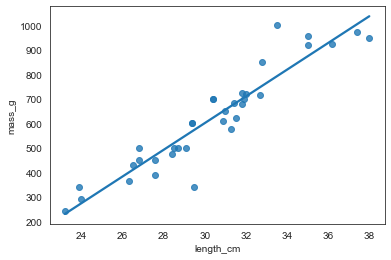

In [31]:
sns.regplot(data=bream,
            x="length_cm",
            y="mass_g",
            ci=None)
plt.show()

### 4. Running the model

Before we can make predictions, we need a fitted model. As before, we call ols with a formula and the dataset, after which we add dot fit. The response, mass in grams, goes on the left-hand side of the formula, and the explanatory variable, length in centimeters, goes on the right. We need to assign the result to a variable to reuse later on. To view the coefficients of the model, we use the params attribute in a print call.

In [32]:
mdl_mass_vs_length = ols("mass_g ~ length_cm",data=bream).fit()
mdl_mass_vs_length.params

Intercept   -1035.347565
length_cm      54.549981
dtype: float64

### 5. Data on explanatory values to predict

The principle behind predicting is to ask questions of the form "if I set the explanatory variables to these values, what value would the response variable have?". That means that the next step is to choose some values for the explanatory variables. To create new explanatory data, we need to store our explanatory variables of choice in a pandas DataFrame. You can use a dictionary to specify the columns. For this model, the only explanatory variable is the length of the fish. You can specify an interval of values using the np dot arange function, taking the start and end of the interval as arguments. Notice that the end of the interval does not include this value. Here, I specified a range of twenty to forty centimeters.

In [33]:
import numpy as np

In [34]:
explanatory_data = pd.DataFrame(data=np.arange(20,41),
                                columns=["length_cm"])
explanatory_data.sample(4)

,length_cm
5,25
3,23
18,38
19,39


### 6. Call predict()

The next step is to call predict on the model, passing the DataFrame of explanatory variables as the argument. The predict function returns a Series of predictions, one for each row of the explanatory data.

In [35]:
mdl_mass_vs_length.predict(explanatory_data)

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64

### 7. Predicting inside a DataFrame

Having a single column of predictions isn't that helpful to work with. It's easier to work with if the predictions are in a DataFrame alongside the explanatory variables. To do this, you can use the pandas assign method. It returns a new object with all original columns in addition to new ones. You start with the existing column, explanatory_data. Then, you use dot assign to add a new column, named after the response variable, mass_g. You calculate it with the same predict code from the previous slide. The resulting DataFrame contains both the explanatory variable and the predicted response. Now we can answer questions like "how heavy would we expect a bream with length twenty three centimeters to be?", even though the original dataset didn't include a bream of that exact length. Looking at the prediction data, you can see that the predicted mass is two hundred and nineteen grams.

In [36]:
explanatory_data = pd.DataFrame(data=np.arange(20,41),
                                columns=["length_cm"])

prediction_data = explanatory_data.assign(mass_g = mdl_mass_vs_length.predict(explanatory_data))
prediction_data.sample(5)

,length_cm,mass_g
14,34,819.351787
1,21,110.202035
10,30,601.151863
8,28,492.051901
18,38,1037.551710


### 8. Showing predictions

Let's include the predictions we just made on the scatter plot. To plot multiple layers, we set a matplotlib figure object called fig before calling regplot and scatterplot. As a result, the plt dot show call will then plot both graphs on the same figure. I've marked the prediction points in red squares to distinguish them from the actual data points. Notice that the predictions lie exactly on the trend line.

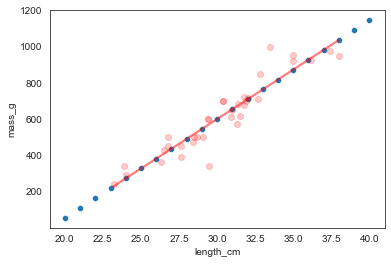

In [37]:
sns.scatterplot(data=prediction_data,x="length_cm",y="mass_g")
sns.regplot(data=bream,x="length_cm",y="mass_g",color="red",ci=None,scatter_kws={"alpha":0.2},
            line_kws={"alpha":0.5})
plt.show()

### 9. Extrapolating

All the fish were between twenty three and thirty eight centimeters, but the linear model allows us to make predictions outside that range. This is called extrapolating. Let's see what prediction we get for a ten centimeter bream. To achieve this, you first create a DataFrame with a single observation of 10 cm. You then predict the corresponding mass as before. Wow. The predicted mass is almost minus five hundred grams! This is obviously not physically possible, so the model performs poorly here. Extrapolation is sometimes appropriate, but can lead to misleading or ridiculous results. You need to understand the context of your data in order to determine whether it is sensible to extrapolate.

In [38]:
little_bream = pd.DataFrame({"length_cm":[10]})
pred_little_bream = little_bream.assign(mass_g=mdl_mass_vs_length.predict(little_bream))
pred_little_bream

,length_cm,mass_g
0,10,-489.847756


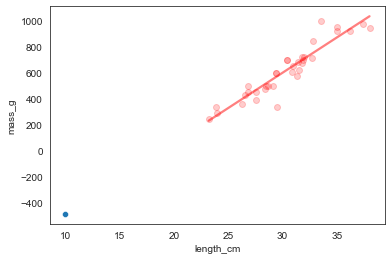

In [39]:
sns.scatterplot(data=pred_little_bream,x="length_cm",y="mass_g")
sns.regplot(data=bream,x="length_cm",y="mass_g",color="red",ci=None,scatter_kws={"alpha":0.2},
            line_kws={"alpha":0.5})
plt.show()

### 10. Let's practice!

Up to you now. I predict that you are about to make some predictions.

## Predicting house prices


<p>Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and get a prediction for the corresponding response variable. The code flow is as follows.</p>
<pre><code>explanatory_data = pd.DataFrame({"explanatory_var": list_of_values})
predictions = model.predict(explanatory_data)
prediction_data = explanatory_data.assign(response_var=predictions)
</code></pre>
<p>Here, you'll make predictions for the house prices in the Taiwan real estate dataset.</p>
<p><code>taiwan_real_estate</code> is available. The fitted linear regression model of house price versus number of convenience stores is available as <code>mdl_price_vs_conv</code>. For future exercises, when a model is available, it will also be fitted.</p>

Import the <code>numpy</code> package using the alias <code>np</code>.

In [40]:
import numpy as np

Create a DataFrame of explanatory data, where the number of convenience stores, <code>n_convenience</code>, takes the integer values from zero to ten.

In [41]:
explanatory_data = pd.DataFrame({"n_convenience":np.arange(11)})


Print <code>explanatory_data</code>.

In [42]:
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [43]:
mdl_price_vs_conv.predict(explanatory_data)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64

In [44]:
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_conv.predict(explanatory_data))
prediction_data.sample(5)

,n_convenience,price_twd_msq
7,7,13.810795
9,9,15.406955
0,0,8.224237
5,5,12.214636
4,4,11.416556


## Visualizing predictions


<p>The prediction DataFrame you created contains a column of explanatory variable values and a column of response variable values. That means you can plot it on the same scatter plot of response versus explanatory data values.</p>
<p><code>prediction_data</code> is available. The code for the plot you created using <code>sns.regplot()</code> in Chapter 1 is shown.</p>

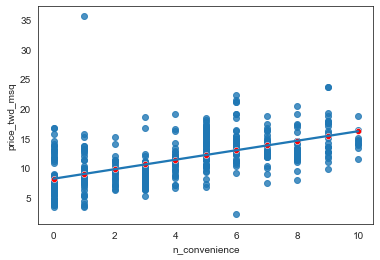

In [45]:
sns.regplot(data=taiwan_real_estate,x="n_convenience",y="price_twd_msq",ci=None)
sns.scatterplot(data=prediction_data,x="n_convenience",y="price_twd_msq",color="red")
plt.show()


## The limits of prediction


<p>In the last exercise, you made predictions on some sensible, could-happen-in-real-life, situations. That is, the cases when the number of nearby convenience stores were between zero and ten. To test the limits of the model's ability to predict, try some impossible situations.</p>
<p>Use the console to try predicting house prices from <code>mdl_price_vs_conv</code> when there are <code>-1</code> convenience stores. Do the same for <code>2.5</code> convenience stores. What happens in each case?</p>
<p><code>mdl_price_vs_conv</code> is available.</p>

In [46]:
impossible = pd.DataFrame({"n_convenience":[-1,2.5]})
impossible_real_life = impossible.assign(price_twd_msq = mdl_price_vs_conv.predict(impossible))
impossible_real_life

,n_convenience,price_twd_msq
0,-1.0,7.426158
1,2.5,10.219437


The model successfully gives a prediction about cases that are impossible in real life.

## Working with model objects

### 1. Working with model objects

The model objects created by ols contain a lot of information. In this video, you'll see how to extract it.

### 2. .params attribute

You already learned how to extract the coefficients or parameters from your fitted model. You add the dot params attribute, which will return a pandas Series including your intercept and slope.

In [47]:
mdl_mass_vs_length.params

Intercept   -1035.347565
length_cm      54.549981
dtype: float64

### 3. .fittedvalues attribute

"Fitted values" is jargon for predictions on the original dataset used to create the model. Access them with the fittedvalues attribute. The result is a pandas Series of length thirty five, which is the number of rows in the bream dataset. The fittedvalues attribute is essentially a shortcut for taking the explanatory variable columns from the dataset, then feeding them to the predict function.

In [48]:
mdl_fitted = mdl_mass_vs_length.fittedvalues
mdl_fitted.head()

0    230.211993
1    273.851977
2    268.396979
3    399.316934
4    410.226930
dtype: float64

In [49]:
mdl_predict = mdl_mass_vs_length.predict(bream["length_cm"])
(mdl_fitted == mdl_predict).any()

True

### 4. .resid attribute

"Residuals" are a measure of inaccuracy in the model fit, and are accessed with the resid attribute. Like fitted values, there is one residual for each row of the dataset. Each residual is the actual response value minus the predicted response value. In this case, the residuals are the masses of breams, minus the fitted values. I illustrated the residuals as red lines on the regression plot. Each vertical line represents a single residual. You'll see more on how to use the fitted values and residuals to assess the quality of your model in Chapter 3.

In [50]:
mdl_resid = mdl_mass_vs_length.resid
mdl_resid.head()

0    11.788007
1    16.148023
2    71.603021
3   -36.316934
4    19.773070
dtype: float64

In [51]:
(mdl_resid == (bream["mass_g"] - mdl_fitted)).any()

True

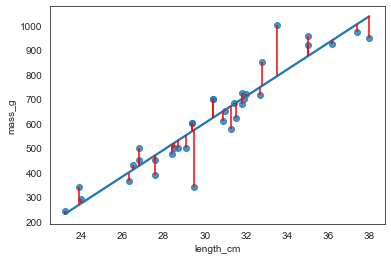

In [52]:
sns.regplot(data=bream,x="length_cm",y ="mass_g",ci=None)
plt.vlines(x=bream["length_cm"],ymax=mdl_mass_vs_length.fittedvalues,ymin=bream["mass_g"],
           colors="red")
plt.show()

### 5. .summary()

The summary method shows a more extended printout of the details of the model. Let's step through this piece by piece.

In [53]:
print(mdl_mass_vs_length.summary())

                            OLS Regression Results                            
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           1.22e-16
Time:                        13:54:45   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.0

### 6. .summary() part 1

First, you see the dependent variable(s) that were used in the model, in addition to the type of regression. You also see some metrics on the performance of the model. These will be discussed in the next chapter.

### 7. summary() part 2

In the second part of the summary, you see details of the coefficients. The numbers in the first column are the ones contained in the params attribute. The numbers in the fourth column are the p-values, which refer to statistical significance. You can learn about them in DataCamp's courses on inference. The last part of the summary are diagnostic statistics that are outside the scope of this course.

### 8. Let's practice!

Your turn to extract some model elements.

## Extracting model elements


<p>The model object created by <code>ols()</code> contains many elements. In order to perform further analysis on the model results, you need to extract its useful bits. The model coefficients, the fitted values, and the residuals are perhaps the most important pieces of the linear model object.</p>
<p><code>mdl_price_vs_conv</code> is available.</p>

Print the parameters of <code>mdl_price_vs_conv</code>.

In [54]:
mdl_price_vs_conv.params

Intercept        8.224237
n_convenience    0.798080
dtype: float64

Print the fitted values of <code>mdl_price_vs_conv</code>.

In [55]:
mdl_price_vs_conv.fittedvalues

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64

Print the residuals of <code>mdl_price_vs_conv</code>.

In [56]:
mdl_price_vs_conv.resid

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64

Print a summary of <code>mdl_price_vs_conv</code>.

In [57]:
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           3.41e-37
Time:                        13:54:45   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

## Manually predicting house prices


<p>You can manually calculate the predictions from the model coefficients. When making predictions in real life, it is better to use <code>.predict()</code>, but doing this manually is helpful to reassure yourself that predictions aren't magic - they are simply arithmetic.</p>
<p>In fact, for a simple linear regression, the predicted value is just the intercept plus the slope times the explanatory variable.</p>
<p><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" display="true" role="presentation" tabindex="0" ctxtmenu_counter="1" style="font-size: 116.7%; position: relative;"><mjx-math display="true" class="MJX-TEX" aria-hidden="true" style="margin-left: 0px; margin-right: 0px;"><mjx-mtext class="mjx-n"><mjx-c class="mjx-c72"></mjx-c><mjx-c class="mjx-c65"></mjx-c><mjx-c class="mjx-c73"></mjx-c><mjx-c class="mjx-c70"></mjx-c><mjx-c class="mjx-c6F"></mjx-c><mjx-c class="mjx-c6E"></mjx-c><mjx-c class="mjx-c73"></mjx-c><mjx-c class="mjx-c65"></mjx-c></mjx-mtext><mjx-mo class="mjx-n" space="4"><mjx-c class="mjx-c3D"></mjx-c></mjx-mo><mjx-mtext class="mjx-n" space="4"><mjx-c class="mjx-c69"></mjx-c><mjx-c class="mjx-c6E"></mjx-c><mjx-c class="mjx-c74"></mjx-c><mjx-c class="mjx-c65"></mjx-c><mjx-c class="mjx-c72"></mjx-c><mjx-c class="mjx-c63"></mjx-c><mjx-c class="mjx-c65"></mjx-c><mjx-c class="mjx-c70"></mjx-c><mjx-c class="mjx-c74"></mjx-c></mjx-mtext><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-c2B"></mjx-c></mjx-mo><mjx-mtext class="mjx-n" space="3"><mjx-c class="mjx-c73"></mjx-c><mjx-c class="mjx-c6C"></mjx-c><mjx-c class="mjx-c6F"></mjx-c><mjx-c class="mjx-c70"></mjx-c><mjx-c class="mjx-c65"></mjx-c></mjx-mtext><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-c2217"></mjx-c></mjx-mo><mjx-mtext class="mjx-n" space="3"><mjx-c class="mjx-c65"></mjx-c><mjx-c class="mjx-c78"></mjx-c><mjx-c class="mjx-c70"></mjx-c><mjx-c class="mjx-c6C"></mjx-c><mjx-c class="mjx-c61"></mjx-c><mjx-c class="mjx-c6E"></mjx-c><mjx-c class="mjx-c61"></mjx-c><mjx-c class="mjx-c74"></mjx-c><mjx-c class="mjx-c6F"></mjx-c><mjx-c class="mjx-c72"></mjx-c><mjx-c class="mjx-c79"></mjx-c></mjx-mtext></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="block"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtext>response</mtext><mo>=</mo><mtext>intercept</mtext><mo>+</mo><mtext>slope</mtext><mo>∗</mo><mtext>explanatory</mtext></math></mjx-assistive-mml></mjx-container></p>
<p><code>mdl_price_vs_conv</code> and <code>explanatory_data</code> are available.</p>

In [58]:
explanatory_data = pd.DataFrame({"n_convenience":np.arange((10))})

Get the coefficients/parameters of <code>mdl_price_vs_conv</code>, assigning to <code>coeffs</code>.

In [59]:
coeffs = mdl_price_vs_conv.params

Get the intercept, which is the first element of <code>coeffs</code>, assigning to <code>intercept</code>.

In [60]:
intercept = coeffs[0]

Get the slope, which is the second element of <code>coeffs</code>, assigning to <code>slope</code>.

In [61]:
slope = coeffs[1]

Manually predict <code>price_twd_msq</code> using the formula, specifying the intercept, slope, and <code>explanatory_data</code>.

In [62]:
price_twd_msq = intercept + slope * explanatory_data

Run the code to compare your manually calculated predictions to the results from <code>.predict()</code>.

In [63]:
price_twd_msq.assign(prediction_auto = mdl_price_vs_conv.predict(explanatory_data))

,n_convenience,prediction_auto
0,8.224237,8.224237
1,9.022317,9.022317
2,9.820397,9.820397
3,10.618477,10.618477
4,11.416556,11.416556
5,12.214636,12.214636
6,13.012716,13.012716
7,13.810795,13.810795
8,14.608875,14.608875
9,15.406955,15.406955


## Regression to the mean

### 1. Regression to the mean

Let's take a short break from thinking about regression modeling, to a related concept called "regression to the mean". Regression to the mean is a property of the data, not a type of model, but linear regression can be used to quantify its effect.

### 2. The concept

You already saw that each response value in your dataset is equal to the sum of a fitted value, that is, the prediction by the model, and a residual, which is how much the model missed by. Loosely speaking, these two values are the parts of the response that you've explained why it has that value, and the parts you couldn't explain with your model. There are two possibilities for why you have a residual. Firstly, it could just be because your model isn't great. Particularly in the case of simple linear regression where you only have one explanatory variable, there is often room for improvement. However, it usually isn't possible or desirable to have a perfect model because the world contains a lot of randomness, and your model shouldn't capture that. In particular, extreme responses are often due to randomness or luck. That means that extremes don't persist over time, because eventually the luck runs out. This is the concept of regression to the mean. Eventually, extreme cases will look more like average cases.

### 3. Pearson's father son dataset

Here's a classic dataset on the heights of fathers and their sons, collected by Karl Pearson, the statistician who the Pearson correlation coefficient is named after. The dataset consists of over a thousand pairs of heights, and was collected as part of a nineteenth century scientific work on biological inheritance. It lets us answer the question, "do tall fathers have tall sons?", and "do short fathers have short sons?".

In [64]:
father_son = pd.read_csv("data/Pearson.txt",delimiter="\t")
father_son

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


### 4. Scatter plot

Here's a scatter plot of the sons' heights versus the fathers' heights. I've added a line where the son's and father's heights are equal, using plt dot axline. The first two arguments determine the intercept and slope, while the linewidth and color arguments help it stand out. I also used plt dot axis with the 'equal' argument so that one centimeter on the x-axis appears the same as one centimeter on the y-axis. If sons always had the same height as their fathers, all the points would lie on this green line.

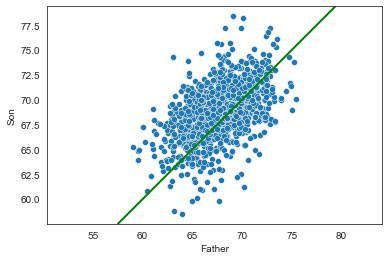

In [65]:
sns.scatterplot(x="Father",y="Son",data=father_son)
plt.axline(xy1=(60,60),
           slope=1,
           lw=2,
           color="green")
plt.axis("equal")
plt.show()

### 5. Adding a regression line

Let's add a black linear regression line to the plot using regplot. You can see that the regression line isn't as steep as the first line. On the left of the plot, the black line is above the green line, suggesting that for very short fathers, their sons are taller than them on average. On the far right of the plot, the black line is below the green line, suggesting that for very tall fathers, their sons are shorter than them on average.

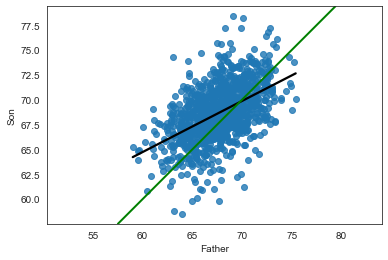

In [66]:
sns.regplot(data =father_son,x="Father",y="Son",ci=None,line_kws={"color":"black"})
plt.axline(xy1=(60,60),slope=1,lw=2,color="green")
plt.axis("equal")
plt.show()

### 6. Running a regression

Running a model quantifies the predictions of how much taller or shorter the sons will be. Here, the sons' heights are the response variable, and the fathers' heights are the explanatory variable.

In [67]:
mdl_son_vs_father = ols("Son ~ Father",data=father_son).fit()
mdl_son_vs_father.params

Intercept    33.892801
Father        0.514006
dtype: float64

### 7. Making predictions

Now we can make predictions. Consider the case of a really tall father, at one hundred and ninety centimeters. At least, that was really tall in the late nineteenth century. The predicted height of the son is one hundred and eighty-three centimeters. Tall, but not quite as tall as his dad. Similarly, the prediction for a one hundred and fifty-centimeter father is one hundred and sixty-three centimeters. Short, but not quite as short as his dad. In both cases, the extreme value became less extreme in the next generation — a perfect example of regression to the mean.

In [68]:
really_tall_father = pd.DataFrame({"Father":[80]})
mdl_son_vs_father.predict(really_tall_father)

0    75.013274
dtype: float64

In [69]:
really_short_father = pd.DataFrame({"Father":[60]})
mdl_son_vs_father.predict(really_short_father)


0    64.733155
dtype: float64

### 8. Let's practice!

Time to apply regression to the mean to sports and finance.

## Plotting consecutive portfolio returns


<p>Regression to the mean is also an important concept in investing. Here you'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&amp;P 500), in 2018 and 2019.</p>
<p>The <code>sp500_yearly_returns</code> dataset contains three columns:</p>
<table>
<thead>
<tr>
<th>variable</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td>symbol</td>
<td>Stock ticker symbol uniquely identifying the company.</td>
</tr>
<tr>
<td>return_2018</td>
<td>A measure of investment performance in 2018.</td>
</tr>
<tr>
<td>return_2019</td>
<td>A measure of investment performance in 2019.</td>
</tr>
</tbody>
</table>
<p>A positive number for the return means the investment increased in value; negative means it lost value.</p>
<p>Just as with baseball home runs, a naive prediction might be that the investment performance stays the same from year to year, lying on the y equals x line.</p>
<p><code>sp500_yearly_returns</code> is available as a <code>pandas</code> DataFrame.</p>

In [70]:
sp500_yearly_returns = pd.read_csv("data/sp500_yearly_returns.csv")
sp500_yearly_returns.sample(5)

,symbol,return_2018,return_2019
477,GPS,-0.219490,-0.281112
78,PLD,-0.062484,0.558657
67,SPGI,0.013737,0.622668
136,SCHW,-0.182257,0.163769
415,NI,0.019247,0.130343


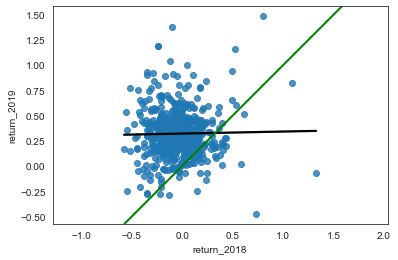

In [71]:
sns.regplot(data=sp500_yearly_returns,x="return_2018",y="return_2019",ci=None,line_kws={"color":"black"})
plt.axline(xy1=(0,0),slope=1,lw=2,color="green")
plt.axis("equal")
plt.show()

The regression trend line looks very different to the y equals x line. As the financial advisors say, "Past performance is no guarantee of future results."

## Modeling consecutive returns


<p>Let's quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions. By looking at companies with extremely high or extremely low returns in 2018, we can see if their performance was similar in 2019.</p>
<p><code>sp500_yearly_returns</code> is available and <code>ols()</code> is loaded.</p>

Run a linear regression on <code>return_2019</code> versus <code>return_2018</code> using <code>sp500_yearly_returns</code> and fit the model. Assign to <code>mdl_returns</code>.

In [72]:
mdl_returns = ols("return_2019 ~ return_2018",data=sp500_yearly_returns).fit()

Print the parameters of the model.

In [73]:
mdl_returns.params

Intercept      0.321321
return_2018    0.020069
dtype: float64

In [74]:
#Create the exploratory data for prediction
explanatory_data =pd.DataFrame({"return_2018":[-1,0,1]})

# use the model return to predict with explanatory data
mdl_returns.predict(explanatory_data)

0    0.301251
1    0.321321
2    0.341390
dtype: float64

Investments that gained a lot in value in 2018 on average gained only a small amount in 2019. Similarly, investments that lost a lot of value in 2018 on average also gained a small amount in 2019

## Transforming variables

### 1. Transforming variables

Sometimes, the relationship between the explanatory variable and the response variable may not be a straight line. To fit a linear regression model, you may need to transform the explanatory variable or the response variable, or both of them.

### 2. Perch dataset

Consider the perch in the fish dataset.

In [75]:
perch = fish[fish["species"]=="Perch"]
perch.sample(5)

,species,mass_g,length_cm
107,Perch,1000.0,39.8
71,Perch,130.0,20.0
78,Perch,170.0,21.5
74,Perch,130.0,20.5
63,Perch,85.0,17.8


### 3. It's not a linear relationship

The upward curve in the mass versus length data prevents us drawing a straight line that follows it closely.

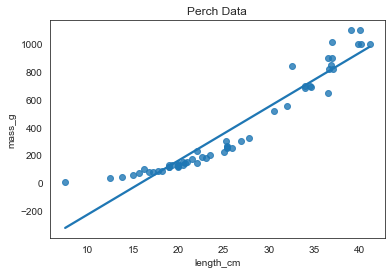

In [76]:
reg = sns.regplot(data=perch,x="length_cm",y="mass_g",ci=None)
reg.set(title="Perch Data")
plt.show()

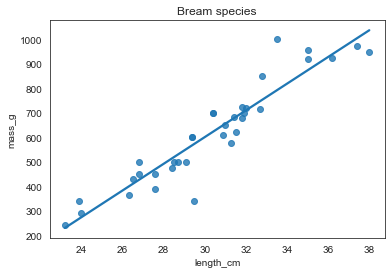

In [77]:
brm = sns.regplot(data=bream,x="length_cm",y="mass_g",ci=None)
brm.set(title="Bream species")
plt.show()

### 4. Bream vs. perch

To understand why the bream had a strong linear relationship between mass and length, but the perch didn't, you need to understand your data. I'm not a fish expert, but looking at the picture of the bream on the left, it has a very narrow body. I guess that as bream get bigger, they mostly get longer and not wider. By contrast, the perch on the right has a round body, so I guess that as it grows, it gets fatter and taller as well as longer. Since the perches are growing in three directions at once, maybe the length cubed will give a better fit.

<br>
<img src="image/img_1.png">

### 5. Plotting mass vs. length cubed

Here's an update to the previous plot. The only change is that the x-axis is now length to the power of three. To do this, first create an additional column where you calculate the length cubed. Then replace this newly created column in your regplot call. The data points fit the line much better now, so we're ready to run a model.

In [78]:
perch

,species,mass_g,length_cm
55,Perch,5.9,7.5
56,Perch,32.0,12.5
57,Perch,40.0,13.8
58,Perch,51.5,15.0
59,Perch,70.0,15.7
60,Perch,100.0,16.2
61,Perch,78.0,16.8
62,Perch,80.0,17.2
63,Perch,85.0,17.8
64,Perch,85.0,18.2


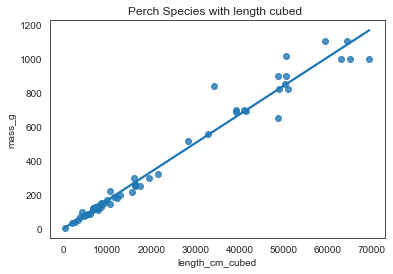

In [79]:
perch = perch.assign(length_cm_cubed = perch["length_cm"]**3)
per = sns.regplot(data=perch,x="length_cm_cubed",y="mass_g",ci=None)
per.set(title = "Perch Species with length cubed ")
plt.show()


### 6. Modeling mass vs. length cubed

To model this transformation, we replace the original length variable with the cubed length variable. We then fit the model and extract its coefficients.

In [80]:
mdl_perch = ols("mass_g ~ length_cm_cubed",data=perch).fit()
mdl_perch.params

Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64

### 7. Predicting mass vs. length cubed

We create the explanatory DataFrame in the same way as usual. Notice that you specify the lengths cubed. We can also add the untransformed lengths column for reference. The code for adding predictions is the same assign and predict combination as you've seen before.

In [81]:
explanatory_data = pd.DataFrame()
explanatory_data = explanatory_data.assign(length_cm = np.arange(start=10,stop=41,step=5),
                                           length_cm_cubed = lambda  x : x.length_cm**3)
explanatory_data.sample(5)

,length_cm,length_cm_cubed
0,10,1000
3,25,15625
1,15,3375
2,20,8000
4,30,27000


In [82]:
prediction_data = explanatory_data.assign(mass_g = mdl_perch.predict(explanatory_data))
prediction_data.sample(5)

,length_cm,length_cm_cubed,mass_g
5,35,42875,719.994447
4,30,27000,453.364084
0,10,1000,16.678135
3,25,15625,262.313982
6,40,64000,1074.801781


### 8. Plotting mass vs. length cubed

The predictions have been added to the plot of mass versus length cubed as red points. As you might expect, they follow the line drawn by regplot. It gets more interesting on the original x-axis. Notice how the red points curve upwards to follow the data. Your linear model has non-linear predictions, after the transformation is undone.

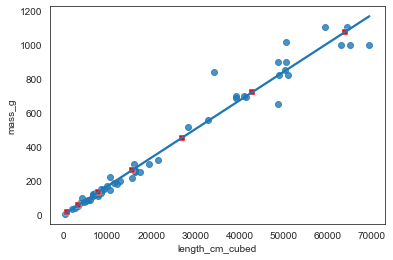

In [83]:
sns.regplot(data=perch,x="length_cm_cubed",y="mass_g",ci=None)
sns.scatterplot(data=prediction_data,x="length_cm_cubed",y="mass_g",color="red",marker="s")
plt.show()

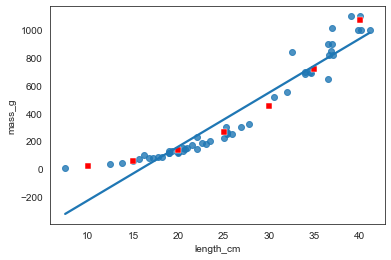

In [84]:
sns.regplot(data=perch,x="length_cm",y="mass_g",ci=None)
sns.scatterplot(data=prediction_data,x="length_cm",y="mass_g",color="red",marker="s")
plt.show()

### 9. Facebook advertising dataset

Let's try one more example using a Facebook advertising dataset. The flow of online advertising is that you pay money to Facebook, who show your advert to Facebook users. If a person sees the advert, it's called an impression. Then some people who see the advert will click on it.

In [85]:
ad_conversion = pd.read_csv("data/ad_conversion.csv")
ad_conversion.sample(5)

,spent_usd,n_impressions,n_clicks
684,16.180000,94136,11
704,234.659998,905699,161
764,33.470000,101586,24
260,1.440000,5040,1
2,1.250000,4259,1


### 10. Plot is cramped

Let's look at impressions versus spend. If we draw the standard plot, the majority of the points are crammed into the bottom-left of the plot, making it difficult to assess whether there is a good fit or not.

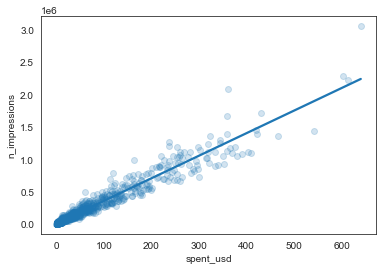

In [86]:
sns.regplot(data=ad_conversion,y="n_impressions",x="spent_usd",ci=None,scatter_kws={"alpha":0.2})
plt.show()

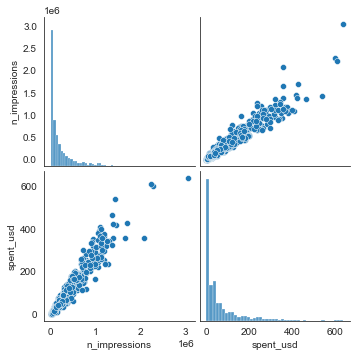

In [87]:
sns.pairplot(data=ad_conversion,x_vars=["n_impressions","spent_usd"],y_vars=["n_impressions","spent_usd"])
plt.show()

### 11. Square root vs square root

By transforming both the variables with square roots, the data are more spread out throughout the plot, and the points follow the line fairly closely. __Square roots are a common transformation when your data has a right-skewed distribution__.

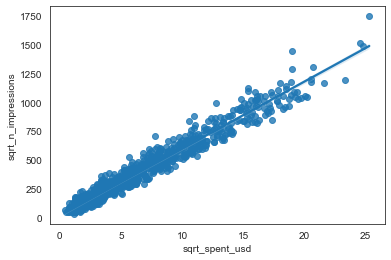

In [88]:
ad_conversion = ad_conversion.assign(sqrt_spent_usd = np.sqrt(ad_conversion.spent_usd),
                                     sqrt_n_impressions = np.sqrt(ad_conversion.n_impressions))
sns.regplot(x="sqrt_spent_usd",y="sqrt_n_impressions",data=ad_conversion)
plt.show()

### 12. Modeling and predicting

Running the model and creating the explanatory dataset are the same as usual, but notice the use of the transformed variables in the formula and DataFrame. I also included the untransformed spent_usd variable for reference. Prediction requires an extra step. Because we took the square root of the response variable (not just the explanatory variable), the predict function will predict the square root of the number of impressions. That means that we have to undo the square root by squaring the predicted responses. Undoing the transformation of the response is called back transformation.

In [89]:
mdl_ad = ols("sqrt_n_impressions ~ sqrt_spent_usd",data=ad_conversion).fit()

In [90]:
explanatory_data = pd.DataFrame({"spent_usd":np.arange(0,601,100),
                                "sqrt_spent_usd":np.sqrt(np.arange(0,601,100))})
explanatory_data.sample(5)

,spent_usd,sqrt_spent_usd
6,600,24.494897
2,200,14.142136
0,0,0.000000
4,400,20.000000
1,100,10.000000


In [91]:
prediction_data = explanatory_data.assign(sqrt_n_impressions = mdl_ad.predict(explanatory_data),
                                          n_impressions = lambda x:x.sqrt_n_impressions ** 2 )
prediction_data.sample(5)

,spent_usd,sqrt_spent_usd,sqrt_n_impressions,n_impressions
1,100,10.000000,597.736582,3.572890e+05
2,200,14.142136,838.981547,7.038900e+05
3,300,17.320508,1024.095320,1.048771e+06
6,600,24.494897,1441.943858,2.079202e+06
5,500,22.360680,1317.643422,1.736184e+06


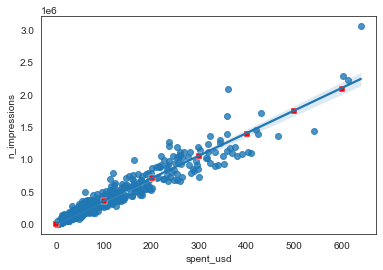

In [92]:
sns.regplot(data=ad_conversion,x="spent_usd",y="n_impressions")
sns.scatterplot(data=prediction_data,x="spent_usd",y="n_impressions",color="red",marker="s")
plt.show()

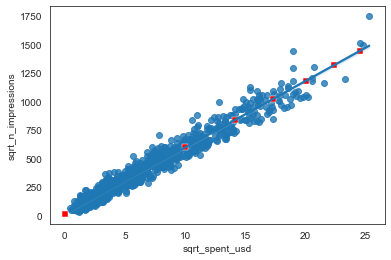

In [93]:
sns.regplot(data=ad_conversion,x="sqrt_spent_usd",y="sqrt_n_impressions")
sns.scatterplot(data=prediction_data,x="sqrt_spent_usd",y="sqrt_n_impressions",color="red",marker="s")
plt.show()

### 13. Let's practice!

Time to transform some variables.

## Transforming the explanatory variable


<p>If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, you'll look at transforming the explanatory variable.</p>
<p>You'll take another look at the Taiwan real estate dataset, this time using the distance to the nearest MRT (metro) station as the explanatory variable. You'll use code to make every commuter's dream come true: shortening the distance to the metro station by taking the square root. Take that, geography!</p>
<p><code>taiwan_real_estate</code> is available.</p>

In [94]:
taiwan_real_estate.sample(4)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
393,967.40000,4,15 to 30,12.193646
252,90.45606,9,0 to 15,15.945537
391,1939.74900,1,0 to 15,9.470499
340,270.88950,0,30 to 45,12.980333


<em>Look at the plot.</em>

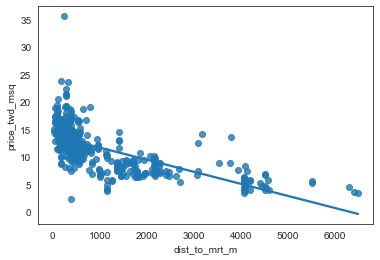

In [95]:
sns.regplot(data=taiwan_real_estate,x="dist_to_mrt_m",y="price_twd_msq",ci=None)
plt.show()

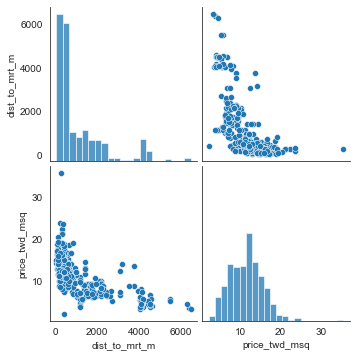

In [96]:
sns.pairplot(data=taiwan_real_estate,x_vars=["dist_to_mrt_m","price_twd_msq"],y_vars=["dist_to_mrt_m","price_twd_msq"])
plt.show()


dist_to_mrt_m look right skew data , square root transformation to  be done .


Add a new column to <code>taiwan_real_estate</code> called <code>sqrt_dist_to_mrt_m</code> that contains the square root of <code>dist_to_mrt_m</code>.

In [97]:
taiwan_real_estate = taiwan_real_estate.assign(sqrt_dist_to_mrt_m = lambda x :np.sqrt(x.dist_to_mrt_m))
taiwan_real_estate.sample(5)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m
27,276.4490,5,0 to 15,10.166415,16.626756
239,837.7233,0,15 to 30,8.986384,28.943450
154,4066.5870,0,15 to 30,6.263238,63.769797
293,383.2805,7,0 to 15,12.859304,19.577551
88,1406.4300,0,0 to 15,14.523449,37.502400


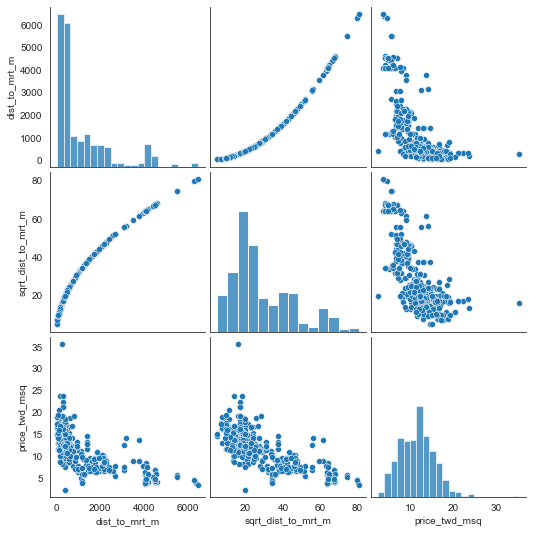

In [98]:
sns.pairplot(data=taiwan_real_estate,x_vars=["dist_to_mrt_m","sqrt_dist_to_mrt_m","price_twd_msq"],y_vars=["dist_to_mrt_m","sqrt_dist_to_mrt_m","price_twd_msq"])
plt.show()

Create the same scatter plot as the first one, but use the new transformed variable on the x-axis instead.

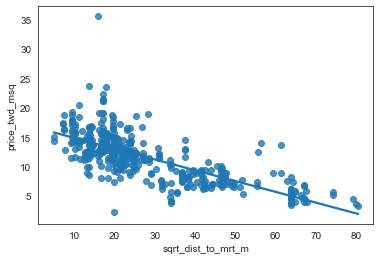

In [99]:
sns.regplot(data=taiwan_real_estate,x="sqrt_dist_to_mrt_m",y="price_twd_msq",ci=None)
plt.show()

<em>Look at the new plot. Notice how the numbers on the x-axis have changed. This is a different line to what was shown before. Do the points track the line more closely?</em>

In [100]:
# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m",data=taiwan_real_estate).fit()
mdl_price_vs_dist.params

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64

In [101]:
explanatory_data = pd.DataFrame({"dist_to_mrt_m" : np.arange(0,81,10) **2,
                                 "sqrt_dist_to_mrt_m" : np.sqrt(np.arange(0,81,10) ** 2)})
explanatory_data.sample(5)

,dist_to_mrt_m,sqrt_dist_to_mrt_m
3,900,30.0
7,4900,70.0
5,2500,50.0
8,6400,80.0
6,3600,60.0


In [102]:
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_dist.predict(explanatory_data))
prediction_data.sample(5)

,dist_to_mrt_m,sqrt_dist_to_mrt_m,price_twd_msq
1,100,10.0,14.881370
6,3600,60.0,5.739227
0,0,0.0,16.709799
4,1600,40.0,9.396085
2,400,20.0,13.052942


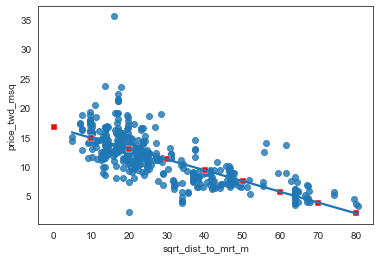

In [103]:
sns.regplot(data=taiwan_real_estate,x="sqrt_dist_to_mrt_m",y="price_twd_msq",ci=None)
sns.scatterplot(data=prediction_data,x="sqrt_dist_to_mrt_m",y="price_twd_msq",color="red",marker="s")
plt.show()


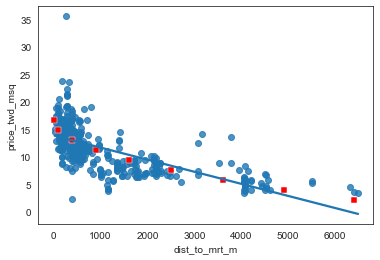

In [104]:
sns.regplot(data=taiwan_real_estate,x="dist_to_mrt_m",y="price_twd_msq",ci=None)
sns.scatterplot(data=prediction_data,x="dist_to_mrt_m",y="price_twd_msq",color="red",marker="s")
plt.show()


## Transforming the response variable too


<p>The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.</p>
<p>In the video, you saw the first step of the digital advertising workflow: spending money to buy ads, and counting how many people see them (the "impressions"). The next step is determining how many people click on the advert after seeing it.</p>
<p><code>ad_conversion</code> is available as a <code>pandas</code> DataFrame.</p>

<em>Look at the plot.</em>

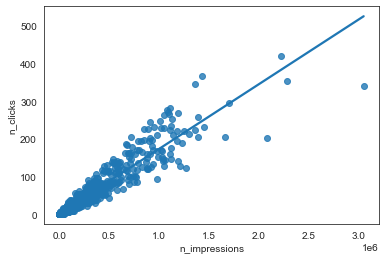

In [105]:
sns.regplot(data = ad_conversion,x="n_impressions",y="n_clicks",ci=None)
plt.show()

Create a <code>qdrt_n_impressions</code> column using <code>n_impressions</code> raised to the power of <code>0.25</code>.

In [106]:
ad_conversion = ad_conversion.assign(qdrt_n_impressions = lambda x : x.n_impressions ** 0.25,
                                     qdrt_n_clicks = lambda  x: x.n_clicks ** 0.25)
ad_conversion.sample(4)

,spent_usd,n_impressions,n_clicks,sqrt_spent_usd,sqrt_n_impressions,qdrt_n_impressions,qdrt_n_clicks
429,12.570000,84494,7,3.545420,290.678517,17.049297,1.626577
812,116.989998,300637,84,10.816191,548.303748,23.415887,3.027400
871,13.560000,91180,10,3.682391,301.960262,17.377004,1.778279
622,44.220000,213016,30,6.649812,461.536564,21.483402,2.340347


Create a regression plot using the transformed variables. <em>Do the points track the line more closely?</em>

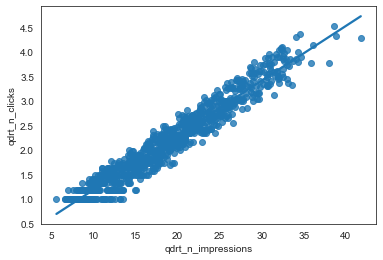

In [107]:
sns.regplot(data=ad_conversion,x="qdrt_n_impressions",y="qdrt_n_clicks",ci=None)
plt.show()

In [108]:
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions",data = ad_conversion).fit()
mdl_click_vs_impression.params

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64

In [109]:
explanatory_data = pd.DataFrame({"n_impressions":np.arange(0,3e6+1,5e5),
                                 "qdrt_n_impressions":np.arange(0,3e6+1,5e5)**0.25})
explanatory_data.sample(5)

,n_impressions,qdrt_n_impressions
0,0.0,0.000000
4,2000000.0,37.606031
2,1000000.0,31.622777
1,500000.0,26.591479
5,2500000.0,39.763536


In [110]:
prediction_data =explanatory_data.assign(qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data),
                                         n_clicks = lambda x : x.qdrt_n_clicks ** 4)
prediction_data.sample(5)

,n_impressions,qdrt_n_impressions,qdrt_n_clicks,n_clicks
3,1500000.0,34.996355,3.974998,249.659131
5,2500000.0,39.763536,4.506696,412.508546
6,3000000.0,41.617915,4.713520,493.607180
2,1000000.0,31.622777,3.598732,167.725102
4,2000000.0,37.606031,4.266063,331.214159


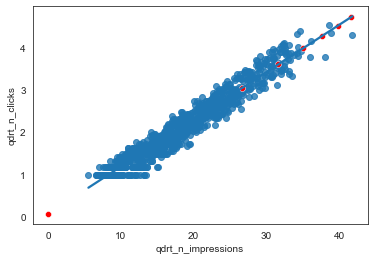

In [111]:
sns.regplot(data=ad_conversion,x="qdrt_n_impressions",y="qdrt_n_clicks",ci=None)
sns.scatterplot(data=prediction_data,x="qdrt_n_impressions",y="qdrt_n_clicks",color="red")
plt.show()

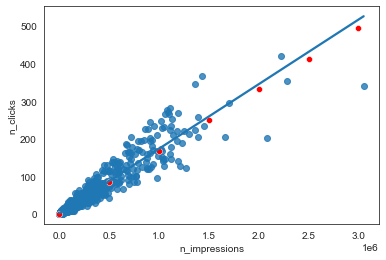

In [112]:
sns.regplot(data=ad_conversion,x="n_impressions",y="n_clicks",ci=None)
sns.scatterplot(data=prediction_data,x="n_impressions",y="n_clicks",color="red")
plt.show()

# Assessing model fit

## Quantifying model fit

### 1. Quantifying model fit

It's usually essential to know whether or not predictions from your model are nonsense. In this chapter, we'll look at ways of quantifying how good your model is.

### 2. Bream and perch models

Previously, you ran models on mass versus length for bream and perch. By merely looking at these scatter plots, you can get a sense that there is a linear relationship between mass and length for bream but not for perch. It would be useful to quantify how strong that linear relationship is.

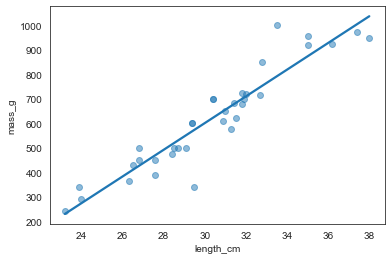

In [113]:
sns.regplot(data=bream,x="length_cm",y="mass_g",ci=None,label="Bream",scatter_kws={"alpha":0.5})
plt.show()

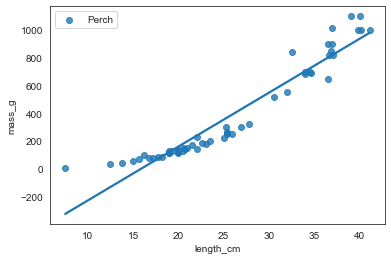

In [114]:
sns.regplot(data=perch,x="length_cm",y="mass_g",ci=None,label="Perch")
plt.legend()
plt.show()

### 3. Coefficient of determination

The first metric we'll discuss is the coefficient of determination. This is sometimes called "r-squared". For boring historical reasons, it's written with a lower case r for simple linear regression and an upper case R when you have more than one explanatory variable. **It is defined as the proportion of the variance in the response variable that is predictable from the explanatory variable.** We'll get to a human-readable explanation shortly. A score of one means you have a perfect fit, and a score of zero means your model is no better than randomness. What constitutes a good score depends on your dataset.


### 4. .summary()

The dot summary method shows several performance metrics in its output. The coefficient of determination is written in the first line and titled "R-squared". Its value is about zero-point-eight-eight.

In [115]:
mdl_bream = ols("mass_g ~ length_cm",data=bream).fit()
print(mdl_bream.summary())

                            OLS Regression Results                            
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           1.22e-16
Time:                        13:54:52   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.0

### 5. .rsquared attribute

Since the output of dot summary isn't easy to work with, a better way to extract the metric is to use the rsquared attribute, which contains the r-squared value as a float.

In [116]:
mdl_bream.rsquared

0.8780627095147174

### 6. It's just correlation squared

For simple linear regression, the interpretation of the coefficient of determination is straightforward. It is simply the correlation between the explanatory and response variables, squared.

In [117]:
bream["mass_g"].corr(bream["length_cm"]) ** 2

0.8780627095147173

### 7. Residual standard error (RSE)

The second metric we'll look at is the residual standard error, or RSE. Recall that each residual is the difference between a predicted value and an observed value. The RSE is, very roughly speaking, **a measure of the typical size of the residuals**. That is, how much the predictions are typically wrong. It has the same unit as the response variable. In the fish models, the response unit is grams. A related, but less commonly used metric is the mean squared error, or MSE. As the name suggests, MSE is the squared residual standard error.

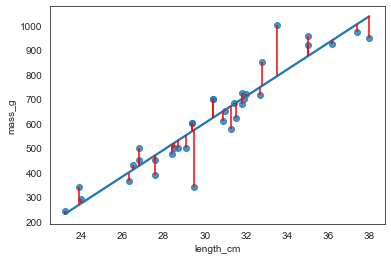

In [118]:
sns.regplot(data=bream,x="length_cm",y="mass_g",ci=None)
plt.vlines(x=bream["length_cm"],ymin=bream["mass_g"],ymax=mdl_bream.fittedvalues,color="red")
plt.show()

### 8. .mse_resid attribute

The summary method unfortunately doesn't contain the RSE. However, it can indirectly be retrieved from the mse_resid attribute, which contains the mean squared error of the residuals. We can calculate the RSE by taking the square root of MSE. As such, the RSE has the same unit as the response variable. The RSE for the bream model is about seventy-four.

In [119]:
print("mse : ",mdl_bream.mse_resid)


mse :  5498.555084973521


In [120]:
print("rse : ",mdl_bream.mse_resid ** 0.5)

rse :  74.15224261594197


### 9. Calculating RSE: residuals squared

To calculate the RSE yourself, it's slightly more complicated. First, you take the square of each residual.

In [121]:
residuals_sq = mdl_bream.resid ** 2

### 10. Calculating RSE: sum of residuals squared

Then you take the sum of these residuals squared.

In [122]:
resid_sum_of_sq = sum(residuals_sq)

### 11. Calculating RSE: degrees of freedom

You then calculate the degrees of freedom of the residuals. This is the number of observations minus the number of model coefficients.

In [123]:
deg_freedom = len(bream.index) - 2

### 12. Calculating RSE: square root of ratio

Finally, you take the square root of the ratio of those two numbers. Reassuringly, the value is still seventy-four.

In [124]:
rse = np.sqrt(resid_sum_of_sq /deg_freedom)
print("rse : ",rse)

rse :  74.15224261594197


### 13. Interpreting RSE

An RSE of seventy-four means that the difference between predicted bream masses and observed bream masses is typically about seventy-four grams.

### 14. Root-mean-square error (RMSE)

Another related metric is the root-mean-square error. This is calculated in the same way, except you don't subtract the number of coefficients in the second to last step. It performs the same task as residual standard error, namely quantifying how inaccurate the model predictions are, but is worse for comparisons between models. You need to be aware that RMSE exists, but typically you should use RSE instead.

In [125]:
n_obs = len(bream.index)
rmse = np.sqrt(resid_sum_of_sq/n_obs)
print("rmse : ",rmse)

rmse :  72.00244396727619


### 15. Let's practice!

Now it's your turn to calculate some metrics.

## Coefficient of determination


<p>The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.</p>
<p>Here, you'll take another look at the second stage of the advertising pipeline: modeling the click response to impressions. Two models are available: <code>mdl_click_vs_impression_orig</code> models <code>n_clicks</code> versus <code>n_impressions</code>. <code>mdl_click_vs_impression_trans</code> is the transformed model you saw in Chapter 2. It models <code>n_clicks</code> to the power of 0.25 versus <code>n_impressions</code> to the power of 0.25.</p>

In [126]:
ad_conversion.head(1)

,spent_usd,n_impressions,n_clicks,sqrt_spent_usd,sqrt_n_impressions,qdrt_n_impressions,qdrt_n_clicks
0,1.43,7350,1,1.195826,85.732141,9.259165,1.0


In [127]:
mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions",data=ad_conversion).fit()
mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions",data=ad_conversion).fit()

Print the summary of <code>mdl_click_vs_impression_orig</code>.

In [128]:
print(mdl_click_vs_impression_orig.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Sat, 20 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:54:53   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

Do the same for <code>mdl_click_vs_impression_trans</code>.

In [129]:
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Sat, 20 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:54:53   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0

In [130]:
print("orig coefficient of determination :",mdl_click_vs_impression_orig.rsquared)
print("trans coefficient of determination:",mdl_click_vs_impression_trans.rsquared)

orig coefficient of determination : 0.8916134973508041
trans coefficient of determination: 0.9445272817143905


he transformed model has a higher coefficient of determination than the original model, suggesting that it gives a better fit to the data.

In [131]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875725


1. The typical difference between observed number of clicks and predicted number of clicks is 20
2. RSE is a measure of accuracy for regression models. It even works on other other statistical model types like regression trees, so you can compare accuracy across different classes of models.

### Visualizing model fit
Several plots can quantify the performance of a model. We'll look at these plots and their interpretation first, then the code to draw them.


### Residual properties of a good fit
If a linear regression model is a good fit, then the residuals are approximately normally distributed, with mean zero.


### Bream and perch again
Earlier, we ran models on the bream and perch datasets. From looking at the scatter plots with linear trend lines, it appeared that the bream model was a good fit, but the perch model wasn't because the observed masses increased faster than linearly with the lengths.

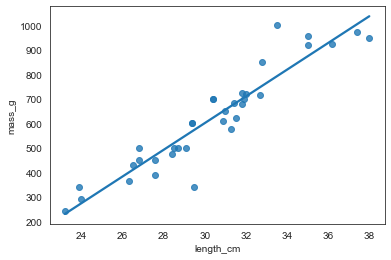

In [132]:
mdl_bream = ols("mass_g ~ length_cm",data=bream).fit()
sns.regplot(data=bream,x="length_cm",y="mass_g",ci=None)
plt.show()

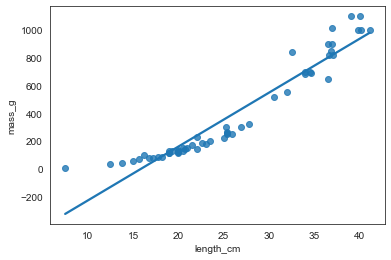

In [133]:
mdl_perch = ols("mass_g ~ length_cm",data=perch).fit()
sns.regplot(data=perch,x="length_cm",y="mass_g",ci=None)
plt.show()


###  Residuals vs. fitted
The first diagnostic plot is of residuals versus fitted values. The blue line is a LOWESS trend line, which is a smooth curve following the data. These aren't good for making predictions but are useful for visualizing trends. If residuals met the assumption that they are normally distributed with mean zero, then the trend line should closely follow the y equals zero line on the plot. For the bream dataset, this is true. By contrast, the perch model doesn't meet the assumption. The residuals are above zero when the fitted value is small or big and below zero in the middle.

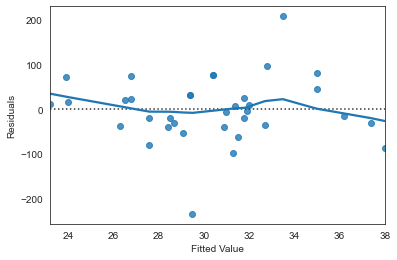

In [134]:
sns.residplot(data=bream,x="length_cm",y="mass_g",lowess=True)
plt.xlabel("Fitted Value")
plt.ylabel("Residuals")
plt.show()


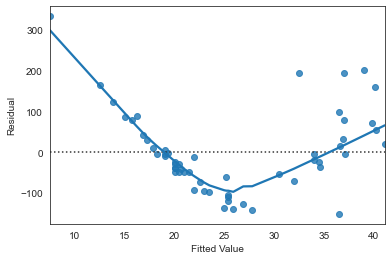

In [135]:
sns.residplot(data=perch,x="length_cm",y="mass_g",lowess=True)
plt.xlabel("Fitted Value")
plt.ylabel("Residual")
plt.show()


### Q-Q plot
The second diagnostic plot is called a Q-Q plot. It shows whether or not the residuals follow a normal distribution. On the x-axis, the points are quantiles from the normal distribution. On the y-axis, you get the sample quantiles, which are the quantiles derived from your dataset. It sounds technical, but interpreting this plot is straightforward. If the points track along the straight line, they are normally distributed. If not, they aren't. Here, most of the bream points follow the line closely. Two points at each extreme don't follow the line. These correspond to the rows of the bream dataset with the highest residuals. The perch dataset doesn't track the line as closely. In particular, you can see on the right-hand side of the plot that the residuals are larger than expected. That means the model is a particularly poor fit for the longer lengths of perch.

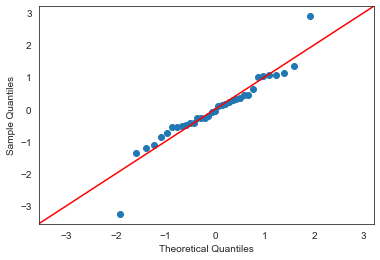

In [136]:
from statsmodels.api import qqplot
qqplot(data=mdl_bream.resid,fit=True,line="45")
plt.show()

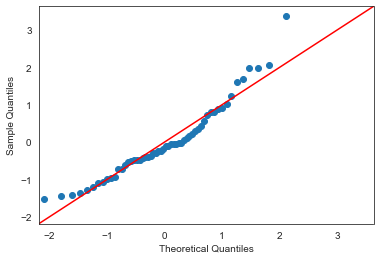

In [137]:
qqplot(data=mdl_perch.resid,fit=True,line="45")
plt.show()


### Scale-location plot
1. The third plot shows the square root of the standardized residuals versus the fitted values. It's often called a scale-location plot, because that's easier to say.

2. It’s also called Spread-Location plot. This plot shows if residuals are spread equally along the ranges of predictors. This is how you can __check the assumption of equal variance__ (homoscedasticity). It’s good if you see a horizontal line with equally (randomly) spread points.

3. Where the first plot showed whether or not the residuals go positive or negative as the fitted values change, this plot shows whether the size of the residuals gets bigger or smaller. The residuals for the bream dataset get a little bigger as the fitted values increase, but it's not a huge change. Again, the plot of the perch model has a trend line that goes up and down all over the place, indicating a poor fit.

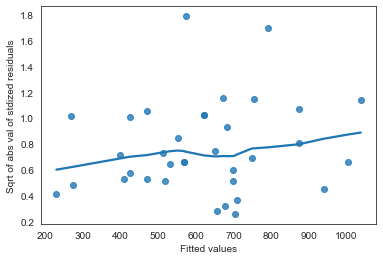

In [138]:
model_norm_residual_bream = mdl_bream.get_influence().resid_studentized_internal
model_norm_residual_abs_sqrt_bream = np.sqrt(np.abs(model_norm_residual_bream))
sns.regplot(x=mdl_bream.fittedvalues,y=model_norm_residual_abs_sqrt_bream,lowess=True,
            ci=None)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")
plt.show()

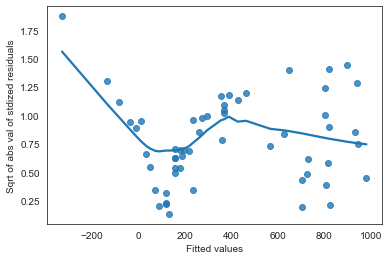

In [139]:
model_norm_residual_perch = mdl_perch.get_influence().resid_studentized_internal
model_norm_residual_abs_sqrt_perch = np.sqrt(np.abs(model_norm_residual_perch))
sns.regplot(x=mdl_perch.fittedvalues,y=model_norm_residual_abs_sqrt_perch,lowess=True,
            ci=None)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")
plt.show()


### residplot()
To create the residuals vs. fitted plot, you can use the residplot function from seaborn. It takes the usual x, y, and data arguments, in addition to the lowess argument. This will add a smooth curve following the data, visualizing the trend of your residuals. You'll also need to specify the x and y labels manually.


### qqplot()
To draw a Q-Q plot, you can use the qqplot function from the statsmodels package. You set the residuals of the model as your data argument and the fit argument to True. This will compare the data quantiles to a normal distribution. The last argument is optional, but when set to "45", set as a string, it will draw a 45-degree line on your plot, making it easier to interpret the pattern.


### Scale-location plot
The last plot, scale-location, requires a bit more preprocessing. You first need to extract the normalized residuals from the model, which you can get by using the get_influence method, then accessing the resid_studentized_internal attribute. Don't worry about this too much now, we'll come back to that in the following lesson. You then take the absolute values and take the square root of these normalized residuals to standardize them. Next, you can call sns dot regplot, passing in mdl_bream dot fittedvalues for x, and the standardized residuals for y. Again, you can also include a lowess argument to make interpretation easier. Lastly, you specify the axes manually.


### Let's practice!
Time to interpret and create diagnostic plots yourself.



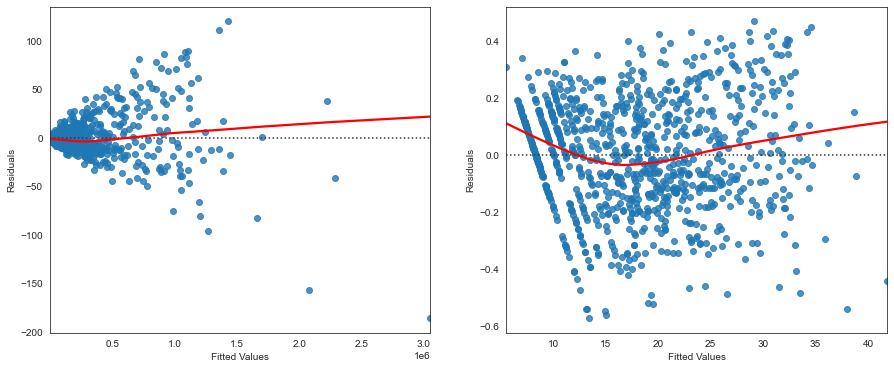

In [140]:
fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.residplot(data=ad_conversion,x="n_impressions",y="n_clicks",lowess=True,ax=ax1,line_kws={"color":"red"})
sns.residplot(data=ad_conversion,x="qdrt_n_impressions",y="qdrt_n_clicks",lowess=True,ax=ax2,line_kws={"color":"red"})
ax1.set(xlabel="Fitted Values",ylabel="Residuals")
ax2.set(xlabel="Fitted Values",ylabel="Residuals")
plt.show()

1. The residuals track the $y = 0$ line more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.
2. In a good model, the residuals should have a trend line close to zero.Normal assumption

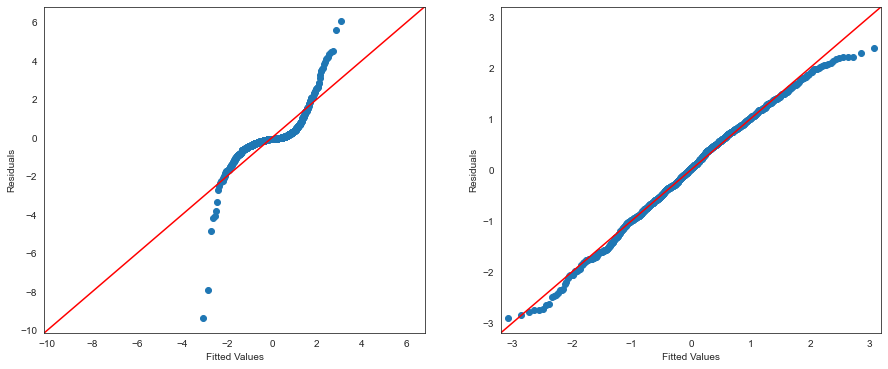

In [141]:
fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
qqplot(data=mdl_click_vs_impression_orig.resid,fit=True,line="45",ax=ax1)
qqplot(data=mdl_click_vs_impression_trans.resid,fit=True,line="45",ax=ax2)
ax1.set(xlabel="Fitted Values",ylabel="Residuals")
ax2.set(xlabel="Fitted Values",ylabel="Residuals")
plt.show()

3. The residuals track the "normality" line more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.
4. f the residuals from the model are normally distributed, then the points will track the line on the Q-Q plot. In this case, neither model is perfect, but the transformed model is closer.

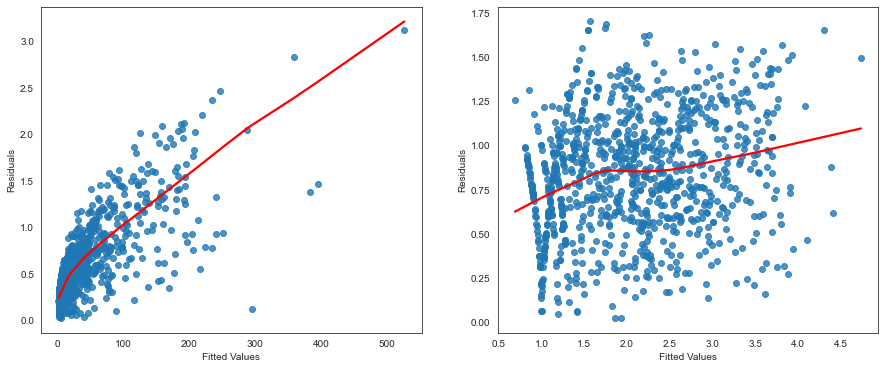

In [142]:
fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.regplot(x=mdl_click_vs_impression_orig.fittedvalues,y=np.sqrt(np.abs(mdl_click_vs_impression_orig.get_influence().resid_studentized_internal)),lowess=True,ax=ax1,line_kws={"color":"red"})
sns.regplot(x=mdl_click_vs_impression_trans.fittedvalues,y=np.sqrt(np.abs(mdl_click_vs_impression_trans.get_influence().resid_studentized_internal)),lowess=True,ax=ax2,line_kws={"color":"red"})
ax1.set(xlabel="Fitted Values",ylabel="Residuals")
ax2.set(xlabel="Fitted Values",ylabel="Residuals")
plt.show()

5. The size of the standardized residuals is more consistent in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data
6.  In a good model, the size of the residuals shouldn't change much as the fitted values change.

## Drawing diagnostic plots


<p>It's time for you to draw these diagnostic plots yourself using the Taiwan real estate dataset and the model of house prices versus number of convenience stores.</p>
<p><code>taiwan_real_estate</code> is available as a <code>pandas</code> DataFrame and <code>mdl_price_vs_conv</code> is available.</p>

Create the residuals versus fitted values plot. Add a <code>lowess</code> argument to visualize the trend of the residuals.

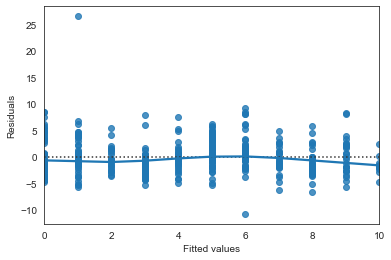

In [143]:
# Plot the residuals vs. fitted values
sns.residplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

Import <code>qqplot()</code> from <code>statsmodels.api</code>.

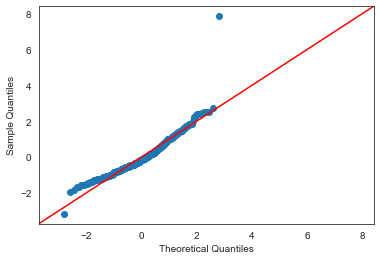

In [144]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

Create the scale-location plot.

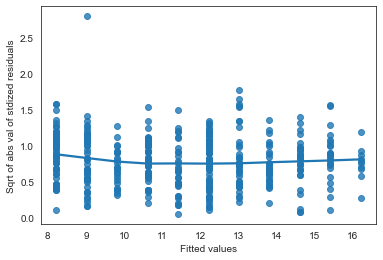

In [145]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

## Outliers, leverage, and influence

### 1. Outliers, leverage, and influence

Sometimes, datasets contain unusual values. We'll look at how to spot them and the consequences they have for your regression models.

### 2. Roach dataset

Let's look at another species in the fish dataset, this time filtering for the Common roach.

In [146]:
roach = fish[fish["species"]=="Roach"]

roach.sample(5)

,species,mass_g,length_cm
39,Roach,120.0,18.6
42,Roach,120.0,19.4
37,Roach,78.0,17.5
41,Roach,110.0,19.1
51,Roach,180.0,23.6


### 3. Which points are outliers?

Here's the standard regression plot of mass versus length. The technical term for an unusual data point is an outlier. So which of these points constitutes an outlier?

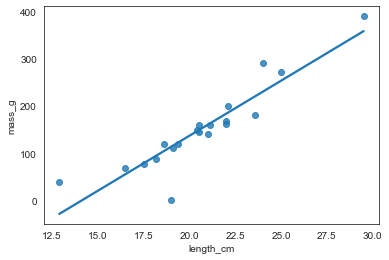

In [147]:
sns.regplot(data=roach,x="length_cm",y="mass_g",ci=None)
plt.show()

### 4. Extreme explanatory values

The first kind of outlier is when you have explanatory variables that are extreme. In the simple linear regression case, it's easy to find and visualize them. There is one extreme short roach and one extreme long roach that I've colored orange here.

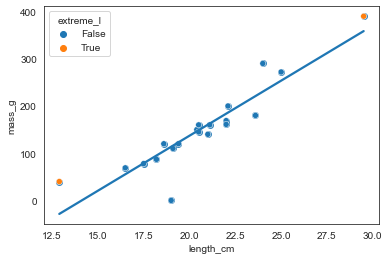

In [148]:
roach = roach.assign(extreme_l =((roach["length_cm"]>26) | (roach["length_cm"] < 15)))
sns.regplot(data=roach,x="length_cm",y="mass_g",ci=None)
sns.scatterplot(data=roach,x="length_cm",y="mass_g",hue="extreme_l")
plt.show()

### 5. Response values away from the regression line

The other property of outliers is when the point lies a long way from the model predictions. Here, there's a roach with mass zero, which seems biologically unlikely. It's shown as a cross.

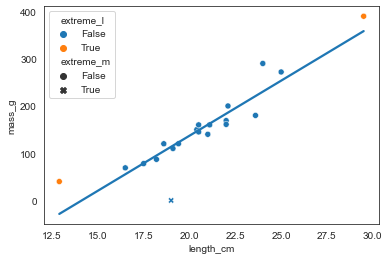

In [149]:
roach = roach.assign(extreme_m = roach["mass_g"] < 1)
sns.regplot(data=roach,x="length_cm",y="mass_g",ci=None,scatter_kws={"alpha":0})
sns.scatterplot(data=roach,x="length_cm",y="mass_g",hue="extreme_l",style="extreme_m")
plt.show()

### 6. Leverage and influence

Leverage quantifies how extreme your explanatory variable values are. That is, it measures the first type of outlier we discussed. With one explanatory variable, you can find the values by filtering, but with many explanatory variables, the mathematics is more complicated. A related concept to leverage is influence. This is a type of "leave one out" metric. That is, it measures how much the model would change if you reran it without that data point. I like to think of it as the torque of the point. The amount of turning force, or torque, when using a wrench is equal to the linear force times the length of the wrench. In a similar way, the influence of each observation is based on the size of the residuals and the leverage.

### 7. .get_influence() and .summary_frame()

Leverage and influence, along with other metrics, are retrieved from the summary frame. You get them by calling the get_influence() method on the fitted model, then calling the summary_frame() method. For historical reasons, leverage is described in the so-called hat matrix. Therefore, the values of leverage are stored in the hat_diag column of the summary frame. Like the fitted values and residuals methods, it returns an array with as many values as there are observations. In this case, each of these leverage values indicates how extreme your roach lengths are.

In [150]:
mdl_roach = ols("mass_g ~ length_cm",data=roach).fit()


In [151]:
summary_roach = mdl_roach.get_influence().summary_frame()
print(summary_roach)

    dfb_Intercept  dfb_length_cm   cooks_d  standard_resid  hat_diag  \
35       1.605912      -1.519147  1.074015        2.167658  0.313729   
36       0.122222      -0.109314  0.010429        0.381169  0.125538   
37      -0.004828       0.004163  0.000020       -0.019557  0.093487   
38      -0.043464       0.035942  0.001980       -0.218961  0.076283   
39       0.072949      -0.058230  0.006610        0.424368  0.068387   
40      -0.643292       0.488301  0.311852       -3.074529  0.061897   
41      -0.022393       0.016726  0.000853       -0.162725  0.060495   
42      -0.009572       0.006724  0.000199       -0.081383  0.056815   
43       0.005115      -0.001595  0.000257        0.098456  0.050264   
44      -0.004478       0.000945  0.000256       -0.098595  0.050092   
45       0.013863      -0.002927  0.002445        0.304524  0.050092   
46      -0.007044      -0.012937  0.007950       -0.546448  0.050554   
47      -0.000448      -0.002153  0.000137       -0.071524  0.05

In [152]:
roach = roach.assign(leverage = summary_roach["hat_diag"])
roach.head()

,species,mass_g,length_cm,extreme_l,extreme_m,leverage
35,Roach,40.0,12.9,True,False,0.313729
36,Roach,69.0,16.5,False,False,0.125538
37,Roach,78.0,17.5,False,False,0.093487
38,Roach,87.0,18.2,False,False,0.076283
39,Roach,120.0,18.6,False,False,0.068387


### 8. Cook's distance

Recall that influence is based on the size of the residuals and the leverage. It isn't a straightforward multiplication; instead, we use a metric called Cook's distance. It is stored in the summary frame as 'cooks_d'.

In [153]:
roach = roach.assign(cooks_dist = summary_roach["cooks_d"])
roach.head()

,species,mass_g,length_cm,extreme_l,extreme_m,leverage,cooks_dist
35,Roach,40.0,12.9,True,False,0.313729,1.074015
36,Roach,69.0,16.5,False,False,0.125538,0.010429
37,Roach,78.0,17.5,False,False,0.093487,0.000020
38,Roach,87.0,18.2,False,False,0.076283,0.001980
39,Roach,120.0,18.6,False,False,0.068387,0.006610


### 9. Most influential roaches

We can find the most influential roaches by arranging the rows by descending Cook's distance values. Here, you can see the two highly leveraged points and the fish with zero mass that gave it a large residual.

In [154]:
roach.sort_values("cooks_dist",ascending=False)

,species,mass_g,length_cm,extreme_l,extreme_m,leverage,cooks_dist
35,Roach,40.0,12.9,True,False,0.313729,1.074015
54,Roach,390.0,29.5,True,False,0.394740,0.365782
40,Roach,0.0,19.0,False,True,0.061897,0.311852
52,Roach,290.0,24.0,False,False,0.099488,0.150064
51,Roach,180.0,23.6,False,False,0.088391,0.061209
53,Roach,272.0,25.0,False,False,0.133386,0.020615
49,Roach,161.0,22.0,False,False,0.058072,0.011516
36,Roach,69.0,16.5,False,False,0.125538,0.010429
46,Roach,140.0,21.0,False,False,0.050554,0.007950
39,Roach,120.0,18.6,False,False,0.068387,0.006610


### 10. Removing the most influential roach

To see how influence works, let's remove the most influential roach. This is the one with the shortest length, at twelve-point-nine centimeters. We draw the usual regression plot but add another regression line using the dataset without that short fish. The slope of the line has completely changed just by having one less data point.

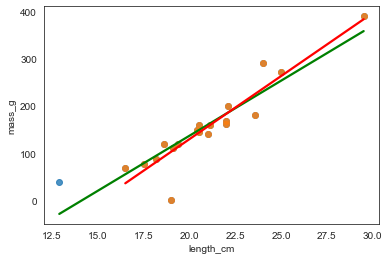

In [155]:
roach_not_short =  roach[roach["length_cm"] != 12.9]
sns.regplot(data=roach,x="length_cm",y="mass_g",ci=None,line_kws={"color":"green"})
sns.regplot(data=roach_not_short,x="length_cm",y="mass_g",ci=None,line_kws={"color":"red"})
plt.show()

### 11. Let's practice!

Let's get under the influence.

## Extracting leverage and influence


<p>In the last few exercises, you explored which observations had the highest leverage and influence. Now you'll extract those values from the model.</p>
<p><code>mdl_price_vs_dist</code> and <code>taiwan_real_estate</code> are available.</p>

Get the summary frame from <code>mdl_price_vs_dist</code> and save as <code>summary_info</code>.

In [156]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values("cooks_dist",ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
270       252.5822              1         0 to 15      35.552194   
148      3780.5900              0        15 to 30      13.645991   
228      3171.3290              0         0 to 15      14.099849   
220       186.5101              9        30 to 45      23.691377   
113       393.2606              6         0 to 15       2.299546   

     sqrt_dist_to_mrt_m  leverage  cooks_dist  
270           15.892835  0.003849    0.115549  
148           61.486503  0.012147    0.052440  
228           56.314554  0.009332    0.035384  
220           13.656870  0.004401    0.025123  
113           19.830799  0.003095    0.022813  


# Simple Logistic Regression Modeling

## Why you need logistic regression

### 1. Why you need logistic regression

The datasets you've seen so far all had a numeric response variable. Now we'll explore the case of a binary response variable.

### 2. Bank churn dataset

Consider this dataset on churn at a European financial services company in 2006. There are 400 rows, each representing a customer. If the customer closed all accounts during the time period, they were considered to have churned, and that column is marked with a one. If they still had an open account at the end of the time period, has_churned is marked with a zero. Using one and zero for the response instead of a logical variable makes the plotting code easier. The two explanatory variables are the time since the customer first bought a service and the time since they last bought a service. Respectively, they measure the length of the relationship with the customer and the recency of the customer's activity. The time columns contain negative values because they have been standardized for confidentiality reasons.

In [157]:
churn = pd.read_csv("data/churn.csv")
churn.sample(5)

,has_churned,time_since_first_purchase,time_since_last_purchase
171,0,-0.681413,0.216829
340,1,-0.236244,0.815859
93,0,0.148608,1.738332
283,1,-0.484710,0.577402
112,0,-0.656656,-0.738649


In [158]:
churn.shape

(400, 3)

### 3. Churn vs. recency: a linear model

Let's run a linear model of churn versus recency and see what happens. We can use the params attribute to pull out the intercept and slope. The intercept is about point-five and the slope is slightly positive at zero-point-zero-six.

In [159]:
mdl_churn_vs_recency_lm = ols("has_churned ~ time_since_last_purchase",data=churn).fit()
mdl_churn_vs_recency_lm.params

Intercept                   0.490780
time_since_last_purchase    0.063783
dtype: float64

In [160]:
intercept,slope = mdl_churn_vs_recency_lm.params

### 4. Visualizing the linear model

Here's a plot of the data points with the linear trend. I used plt dot axline rather than sns dot regplot so the line isn't limited to the extent of the data. All the churn values are zero or one, but the model predictions are fractional. You can think of the predictions as being probabilities that the customer will churn.

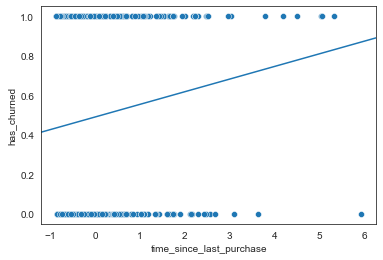

In [161]:
sns.scatterplot(data=churn,x="time_since_last_purchase",y="has_churned")
plt.axline(xy1=(0,intercept),slope=slope)
plt.show()

### 5. Zooming out

Zooming out by setting axis limits with xlim and ylim shows the problem with using a linear model. In the bottom-left of the plot, the model predicts negative probabilities. In the top-right, the model predicts probabilities greater than one. Both situations are impossible.

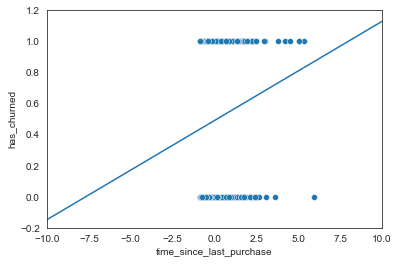

In [163]:
sns.scatterplot(data=churn,x="time_since_last_purchase",y="has_churned")
plt.axline(xy1=(0,intercept),slope=slope)
plt.xlim([-10,10])
plt.ylim([-0.2,1.2])
plt.show()

### 6. What is logistic regression?

The solution is to use logistic regression models, which are a type of generalized linear model, used when the response variable is logical. Whereas linear models result in predictions that follow a straight line, logistic models result in predictions that follow a logistic curve, which is S-shaped.

### 7. Logistic regression using logit()

To run a logistic regression, you need a new function from statsmodels. From the same statsmodels dot formula dot api package, import the logit function. This function begins the process of fitting a logistic regression model to your data. The function name is the only difference between fitting a linear regression and a logistic regression: the formula and data argument remain the same, and you use the dot fit method to fit the model. As before, you get two coefficients, one for the intercept and one for the numerical explanatory variable. The interpretation is a little different; we'll come to that later.

In [197]:
from statsmodels.formula.api import logit
mdl_churn_vs_recency_logit = logit("has_churned ~ time_since_last_purchase",data=churn).fit()
mdl_churn_vs_recency_logit.params

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64

### 8. Visualizing the logistic model

Let's add the logistic regression predictions to the plot. regplot will draw a logistic regression trend line when you set the logistic argument to True. Notice that the logistic regression line, shown in blue, is slightly curved. Especially when there's a longer time since the last purchase values, the blue trend line no longer follows the black, linear trend line anymore.

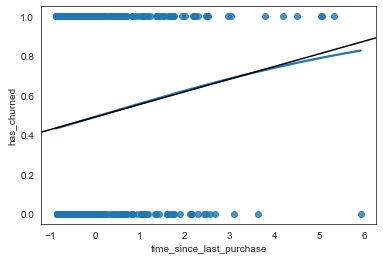

In [167]:
sns.regplot(data=churn,x="time_since_last_purchase",
            y="has_churned",

            ci=None,
            logistic=True)
plt.axline(xy1=(0,intercept),
           slope=slope,
           color="black")
plt.show()

### 9. Zooming out

Now zooming out shows that the logistic regression curve never goes below zero or above one. To interpret this curve, when the standardized time since last purchase is very small, the probability of churning is close to zero. When the time since last purchase is very high, the probability is close to one. That is, customers who recently bought things are less likely to churn.

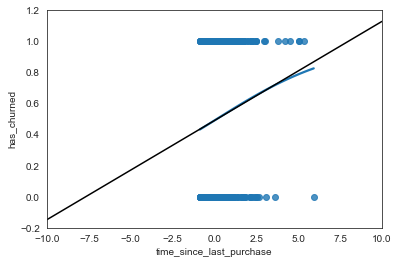

In [175]:
sns.regplot(data=churn,x="time_since_last_purchase",
            y="has_churned",
            ci=None,
            logistic=True,
            )
plt.axline(xy1=(0,intercept),
           slope=slope,
           color="black")
plt.xlim(-10,10)
plt.ylim(-.2,1.2)
plt.show()

### 10. Let's practice!

Let's get logistic on this dataset.

## Exploring the explanatory variables


<p>When the response variable is logical, all the points lie on the <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="2" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D466 TEX-I"></mjx-c></mjx-mi><mjx-mo class="mjx-n" space="4"><mjx-c class="mjx-c3D"></mjx-c></mjx-mo><mjx-mn class="mjx-n" space="4"><mjx-c class="mjx-c30"></mjx-c></mjx-mn></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>y</mi><mo>=</mo><mn>0</mn></math></mjx-assistive-mml></mjx-container> and <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="3" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D466 TEX-I"></mjx-c></mjx-mi><mjx-mo class="mjx-n" space="4"><mjx-c class="mjx-c3D"></mjx-c></mjx-mo><mjx-mn class="mjx-n" space="4"><mjx-c class="mjx-c31"></mjx-c></mjx-mn></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>y</mi><mo>=</mo><mn>1</mn></math></mjx-assistive-mml></mjx-container> lines, making it difficult to see what is happening. In the video, until you saw the trend line, it wasn't clear how the explanatory variable was distributed on each line. This can be solved with a histogram of the explanatory variable, grouped by the response.</p>
<p>You will use these histograms to get to know the financial services churn dataset seen in the video.</p>
<p><code>churn</code> is available as a <code>pandas</code> DataFrame.</p>

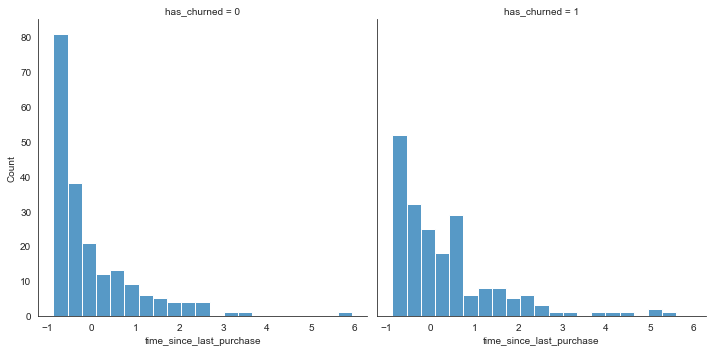

In [176]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(x="time_since_last_purchase",data=churn,col="has_churned")

plt.show()

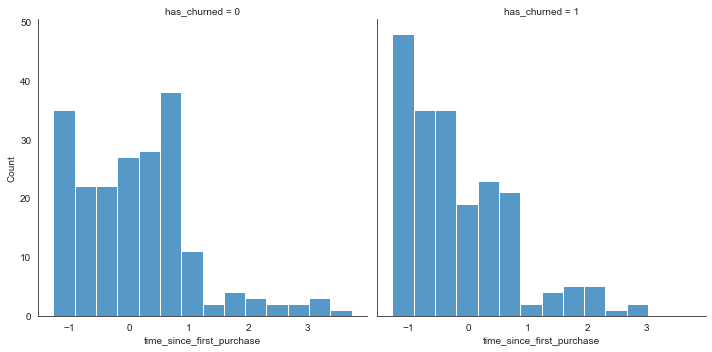

In [177]:
# Redraw the plot with time_since_first_purchase
sns.displot(x="time_since_first_purchase",
            data=churn,col="has_churned")

plt.show()

## Visualizing linear and logistic models


<p>As with linear regressions, <code>regplot()</code> will draw model predictions for a logistic regression without you having to worry about the modeling code yourself. To see how the predictions differ for linear and logistic regressions, try drawing both trend lines side by side. Spoiler: you should see a linear (straight line) trend from the linear model, and a logistic (S-shaped) trend from the logistic model.</p>
<p><code>churn</code> is available.</p>

Using <code>churn</code>, plot <code>has_churned</code> versus <code>time_since_first_purchase</code> as a scatter plot with a red linear regression trend line (without a standard error ribbon).

<AxesSubplot:xlabel='time_since_first_purchase', ylabel='has_churned'>

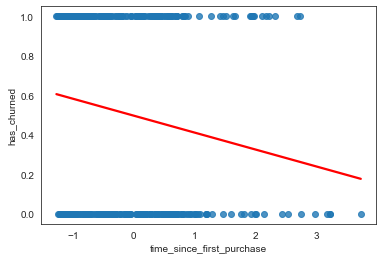

In [178]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            line_kws={"color": "red"})

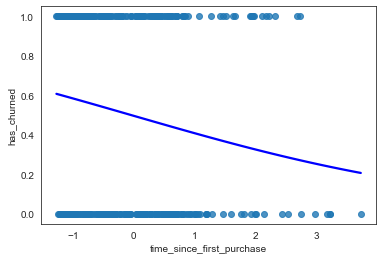

In [180]:
# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(data=churn,x="time_since_first_purchase",y="has_churned",
            ci=None,logistic=True,line_kws={"color":"blue"})

plt.show()

## Logistic regression with logit()


<p>Logistic regression requires another function from <code>statsmodels.formula.api</code>: <code>logit()</code>. It takes the same arguments as <code>ols()</code>: a <code>formula</code> and <code>data</code> argument. You then use <code>.fit()</code> to fit the model to the data.</p>
<p>Here, you'll model how the length of relationship with a customer affects churn.</p>
<p><code>churn</code> is available.</p>

Import the <code>logit()</code> function from <code>statsmodels.formula.api</code>.

In [181]:
# Import logit
from statsmodels.formula.api import logit

Fit a logistic regression of <code>has_churned</code> versus <code>time_since_first_purchase</code> using the <code>churn</code> dataset. Assign to <code>mdl_churn_vs_relationship</code>.

In [182]:

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase",data=churn).fit()

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4


Print the parameters of the fitted model.

In [183]:

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


## Predictions and odds ratios

### 1. Predictions and odds ratios

Let's see how to make predictions with your logistic regression model.

### 2. The regplot() predictions

You've already seen how regplot will give you a logistic regression trend line.

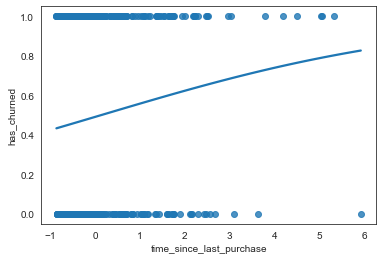

In [185]:
sns.regplot(data=churn,
            x="time_since_last_purchase",
            y="has_churned",
            ci=None,
            logistic=True)
plt.show()

### 3. Making predictions

To make a prediction with a logistic model, you use the same technique as for linear models. Create a DataFrame of explanatory variable values. Then add a response column calculated using the predict method.

In [200]:
explanatory_data = pd.DataFrame({"time_since_last_purchase":np.arange(-1,6.25,0.25)})
prediction_data = explanatory_data.assign(has_churned =mdl_churn_vs_recency_logit.predict(explanatory_data))


### 4. Adding point predictions

As with the linear case, we can add those predictions onto the plot by creating a scatter plot with prediction_data as the data argument. As expected, these points follow the trend line.

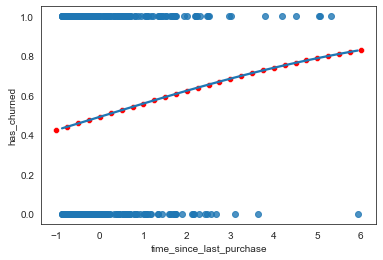

In [187]:
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic =True)
sns.scatterplot(x="time_since_last_purchase",
                y="has_churned",
                data=prediction_data,
                color="red")
plt.show()

### 5. Getting the most likely outcome

One simpler prediction you can make, rather than calculating probabilities of a response, is to calculate the most likely response. That is, if the probability of churning is less than 0-point-5, the most likely outcome is that they won't churn. If their probability is greater then 0-point-5, it's more likely that they will churn. To calculate this, simply round the predicted probabilities using numpy's round() function.

In [188]:
prediction_data = prediction_data.assign(most_likely_outcome = np.round(prediction_data["has_churned"]))

### 6. Visualizing most likely outcome

We can plot the most likely outcome by using the prediction data with the numbers we just calculated. For recently active customers, the most likely outcome is that they don't churn. Otherwise, the most likely outcome is that they churn.

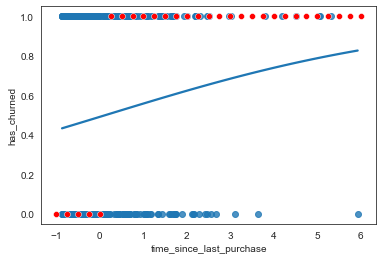

In [189]:
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic =True)
sns.scatterplot(x="time_since_last_purchase",
                y="most_likely_outcome",
                data=prediction_data,
                color="red")
plt.show()

### 7. Odds ratios

There is another way to talk about binary responses, commonly used in gambling. The odds ratio is the probability that something happens, divided by the probability that it doesn't. For example, a probability of zero-point-two-five is the same as the odds of "three to one against", because the probability of the event not happening is zero-point-seven-five, which is three times as much. The plot shows the relationship between the two terms.

### 8. Calculating odds ratio

We can calculate the odds ratio by dividing the predicted response probability by one minus that number.

In [190]:
prediction_data = prediction_data.assign(odd_ratio = prediction_data["has_churned"] / (1- prediction_data["has_churned"]))

### 9. Visualizing odds ratio

It doesn't make sense to visualize odds with the original data points, so we need a new plot. To create a plot with a continuous line, we can use seaborn's lineplot function. Here, the dotted line where the odds ratio is one indicates where churning is just as likely as not churning. This has been added by using the axhline function. In the bottom-left, the predictions are below one, so the chance of churning is less than the chance of not churning. In the top-right, the chance of churning is about five times more than the chance of not churning.

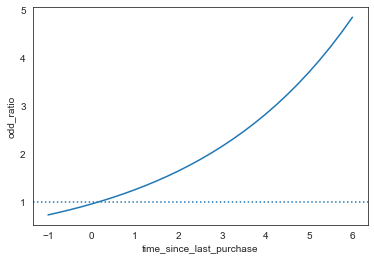

In [193]:
sns.lineplot(x="time_since_last_purchase",
             y="odd_ratio",
             data = prediction_data)

plt.axhline(y=1,ls="dotted")

### 10. Visualizing log odds ratio

One nice property of logistic regression odds ratios is that on a log-scale, they change linearly with the explanatory variable. This plot adds a logarithmic y scale.

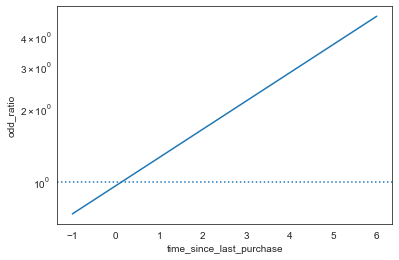

In [194]:
sns.lineplot(x="time_since_last_purchase",
             y="odd_ratio",
             data = prediction_data)

plt.axhline(y=1,ls="dotted")
plt.yscale("log")
plt.show()

### 11. Calculating log odds ratio

This nice property of the logarithm of odds ratios means log-odds ratio is another common way of describing logistic regression predictions. In fact, the log-odds ratio is also known as the logit, hence the name of the function you've been using to model logistic regression.

### 12. All predictions together

Here are all the values calculated in the prediction dataset. Some column names are abbreviated for better printing.

### 13. Comparing scales

Each way of describing responses has different benefits. Most likely outcome is easiest to understand because the answer is always yes or no, but this lacks precision. Probabilities and odds ratios are still fairly easy to understand for a data literate audience. However, the non-linear predictions make it hard to reason about how changes in the explanatory variable will change the response. Log odds ratio is difficult to interpret for individual values, but the linear relationship with the explanatory variables makes it easy to reason about changes.

<br>
<img src="image/img_2.png">

### 14. Let's practice!

Let's make some predictions.

## Probabilities


<p>There are four main ways of expressing the prediction from a logistic regression model – we'll look at each of them over the next four exercises. Firstly, since the response variable is either "yes" or "no", you can make a prediction of the probability of a "yes". Here, you'll calculate and visualize these probabilities.</p>
<p>Two variables are available:</p>
<ul>
<li><code>mdl_churn_vs_relationship</code> is the fitted logistic regression model of <code>has_churned</code> versus <code>time_since_first_purchase</code>.</li>
<li><code>explanatory_data</code> is a DataFrame of explanatory values.</li>
</ul>

Create a DataFrame, <code>prediction_data</code>, by assigning a column <code>has_churned</code> to <code>explanatory_data</code>.

In the <code>has_churned</code> column, store the predictions of the probability of churning: use the model, <code>mdl_churn_vs_relationship</code>, and the explanatory data, <code>explanatory_data</code>.

Print the first five lines of the prediction DataFrame.

In [201]:
explanatory_data = pd.DataFrame({"time_since_first_purchase":np.arange(-1.5,4.25,0.25)})
explanatory_data.shape

(23, 1)

In [202]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned
0                      -1.50     0.626448
1                      -1.25     0.605470
2                      -1.00     0.584096
3                      -0.75     0.562401
4                      -0.50     0.540465


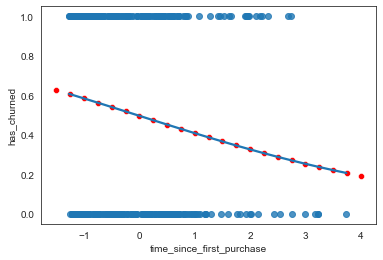

In [205]:
# Create a scatter plot with logistic trend line
sns.regplot(data=churn,x="time_since_first_purchase",y="has_churned",
             ci=None,logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(data=prediction_data,x="time_since_first_purchase",y="has_churned",color="red")


plt.show()

## Most likely outcome


<p>When explaining your results to a non-technical audience, you may wish to side-step talking about probabilities and simply explain the most likely outcome. That is, rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn. The trade-off here is easier interpretation at the cost of nuance.</p>
<p><code>mdl_churn_vs_relationship</code>, <code>explanatory_data</code>, and <code>prediction_data</code> are available from the previous exercise.</p>

Update <code>prediction_data</code> to add a column of the most likely churn outcome, <code>most_likely_outcome</code>.

Print the first five lines of <code>prediction_data</code>.

In [206]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.50     0.626448                  1.0
1                      -1.25     0.605470                  1.0
2                      -1.00     0.584096                  1.0
3                      -0.75     0.562401                  1.0
4                      -0.50     0.540465                  1.0


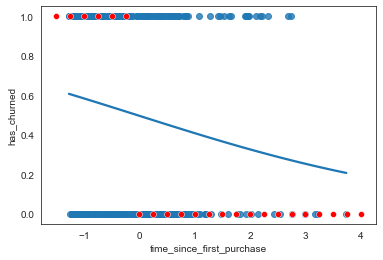

In [207]:
# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(data=prediction_data,x="time_since_first_purchase",y="most_likely_outcome",color="red")


plt.show()

## Odds ratio


<p>Odds ratios compare the probability of something happening with the probability of it not happening. This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning". </p>
<p><code>mdl_churn_vs_relationship</code>, <code>explanatory_data</code>, and <code>prediction_data</code> are available from the previous exercise.</p>

Update <code>prediction_data</code> to add a column, <code>odds_ratio</code>, of the odds ratios.

In [208]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.50     0.626448                  1.0    1.677003
1                      -1.25     0.605470                  1.0    1.534661
2                      -1.00     0.584096                  1.0    1.404400
3                      -0.75     0.562401                  1.0    1.285197
4                      -0.50     0.540465                  1.0    1.176111


Print the first five lines of <code>prediction_data</code>.

Update <code>prediction_data</code> to add a <code>log_odds_ratio</code> column derived from <code>odds_ratio</code>.

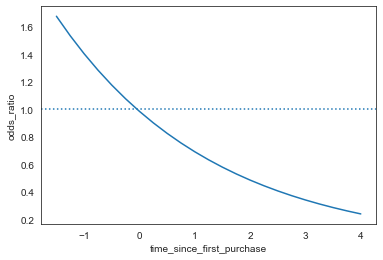

In [210]:
# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",y="odds_ratio",data=prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()


## Log odds ratio


<p>One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.</p>
<p>Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.</p>
<p><code>mdl_churn_vs_relationship</code>, <code>explanatory_data</code>, and <code>prediction_data</code> are available from the previous exercise.</p>

Print the first five lines of <code>prediction_data</code>.

In [211]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                      -1.50     0.626448                  1.0    1.677003   
1                      -1.25     0.605470                  1.0    1.534661   
2                      -1.00     0.584096                  1.0    1.404400   
3                      -0.75     0.562401                  1.0    1.285197   
4                      -0.50     0.540465                  1.0    1.176111   

   log_odds_ratio  
0        0.517008  
1        0.428309  
2        0.339610  
3        0.250912  
4        0.162213  


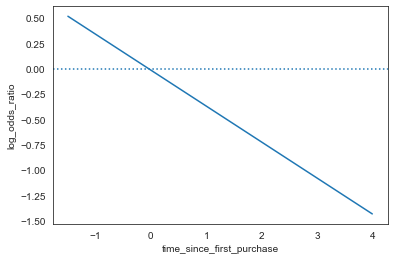

In [212]:
# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

## Quantifying logistic regression fit

### 1. Quantifying logistic regression fit

In this last lesson, we'll assess the performance of logistic regression models. The diagnostic plots we drew for linear models are less useful in the logistic case. Instead, we'll look at confusion matrices.



### 2. The four outcomes

A logical response variable leads to four possible outcomes. If the customer didn't churn and we predicted they wouldn't, or if they did churn and we predicted that, the model did well. There are two bad cases. Predicting the customer churned when they didn't is called a false positive. Predicting the customer didn't churn when they did is called a false negative. The counts of each outcome are called a confusion matrix.

| 	             | Predicted False   	 | Predicted True	   |
|---------------|---------------------|-------------------|
| Actual False   	 | correct	            | 	  false positive |
| Actual True	  | false negative	     | 	 correct         |

### 3. Confusion matrix: counts of outcomes

Recall the model of churn versus recency. Getting the counts of model outcomes required some data manipulation. First, we get the actual responses from the has_churned column of the dataset. Next we get the predicted responses from the model. Calling the predict method on the fitted logistic regression model returns the predicted values of each observation in the dataset. These predicted values are probabilities. To get the most likely outcome, we need to round the values to zero or one. We then combine actual and predicted responses in a DataFrame, and use the value_counts method to get the counts of each combination of values. This is the confusion matrix mentioned earlier. We correctly predicted that one hundred and forty one customers didn't churn and eighty nine customers did churn. There were fifty nine false positives and one hundred and eleven false negatives.

In [214]:
actual_response = churn["has_churned"]
predicted_response = np.round(mdl_churn_vs_recency_logit.predict())
outcomes = pd.DataFrame({"actual_response":actual_response,
                         "predicted_response":predicted_response})
outcomes.value_counts(sort=False)

actual_response  predicted_response
0                0.0                   141
                 1.0                    59
1                0.0                   111
                 1.0                    89
dtype: int64

### 4. Visualizing the confusion matrix

The confusion matrix can also be created automatically with the pred_table method. Calling pred_table on the fitted model object will return an array. The true negatives and true positives are on the main diagonal of the matrix, the false negatives and false positives are on the second diagonal of the matrix. These values are the same as what we calculated on the previous slide. The mosaic function from the statsmodels package lets you easily plot the confusion matrix. To interpret this, start by looking at the column widths. The width of each column is proportional to the fraction of observations in each category of actual values. Here, there are two hundred actual churns and two hundred actual not churns, so each column has the same width. Then each column displays the fraction of predicted observations with each value. Here, just over a quarter of the actual not churns were predicted to be churns, so the block in the upper left is just over a quarter of the height of the first column.

In [215]:
conf_matrix = mdl_churn_vs_recency_logit.pred_table()
print(conf_matrix)

[[141.  59.]
 [111.  89.]]


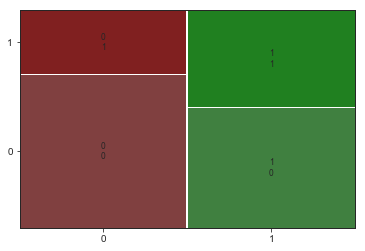

In [217]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)
plt.show()

### 5. Accuracy

Now let's look at ways of quantifying model fit using performance metrics. The first metric is the model accuracy. This is the proportion of correct predictions. That is, the number of true negatives plus the true positives, divided by the total number of observations. Higher accuracy is better. The total number of correct observations is one hundred and forty one plus eighty nine. We divide this total by the total number of observations, which is the sum of all four numbers.
<br>
<img src="image/img_3.png">

In [218]:
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
TP = conf_matrix[1,1]

acc = (TP+TN) / (TN + TP +FN+FP)
print("accuracy",acc)

accuracy 0.575


### 6. Sensitivity

The second metric is sensitivity. This is the proportion of observations where the actual response was true where the model also predicted that they were true. That is, the number of true positives divided by the sum of the false negatives and true positives. Higher sensitivity is better. Here, eighty nine of the two hundred customers who churned were correctly predicted to churn.

<br>
<img src="image/img_3.png">

In [220]:
sens = TP / (FN+TP)
print("sensitivity ", sens)

sensitivity  0.445


### 7. Specificity

The third metric is specificity. This is the proportion of observations where the actual response was false where the model also predicted that they were false. That is, the number of true negatives divided by the sum of the true negatives and false positives. Again, higher specificity is better, though there is often a trade-off where improving specificity will decrease sensitivity, or increasing sensitivity will decrease specificity. Here, one hundred and forty one of the two hundred customers who didn't churn were correctly predicted to not churn.<br>
<img src="image/img_3.png">

In [221]:
spec = TN / (TN +FP)
print("specificity",spec)

specificity 0.705


### 8. Let's practice!

Time for the last round of exercises. Try not to get confused by the confusion matrix.

## Calculating the confusion matrix


<p>A <em>confusion matrix</em> (occasionally called a <em>confusion table</em>) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.</p>
<ol>
<li><strong>True positive:</strong> The customer churned and the model predicted they would.</li>
<li><strong>False positive:</strong> The customer didn't churn, but the model predicted they would.</li>
<li><strong>True negative:</strong> The customer didn't churn and the model predicted they wouldn't.</li>
<li><strong>False negative:</strong> The customer churned, but the model predicted they wouldn't.</li>
</ol>
<p><code>churn</code> and <code>mdl_churn_vs_relationship</code> are available.</p>

Get the actual responses by subsetting the <code>has_churned</code> column of the dataset. Assign to <code>actual_response</code>.

Get the "most likely" predicted responses from the model. Assign to <code>predicted_response</code>.

Create a DataFrame from <code>actual_response</code> and <code>predicted_response</code>. Assign to <code>outcomes</code>.

Print <code>outcomes</code> as a table of counts, representing the confusion matrix. <em>This has been done for you.</em>

In [222]:
# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response":actual_response,
                         "predicted_response":predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


## Drawing a mosaic plot of the confusion matrix


<p>While calculating the performance matrix might be fun, it would become tedious if you needed multiple confusion matrices of different models. Luckily, the <code>.pred_table()</code> method can calculate the confusion matrix for you.</p>
<p>Additionally, you can use the output from the <code>.pred_table()</code> method to visualize the confusion matrix, using the <code>mosaic()</code> function.</p>
<p><code>churn</code> and <code>mdl_churn_vs_relationship</code> are available.</p>

Import the <code>mosaic()</code> function from <code>statsmodels.graphics.mosaicplot</code>.

Create <code>conf_matrix</code> using the <code>.pred_table()</code> method and print it.

Draw a mosaic plot of the confusion matrix.

[[112.  88.]
 [ 76. 124.]]


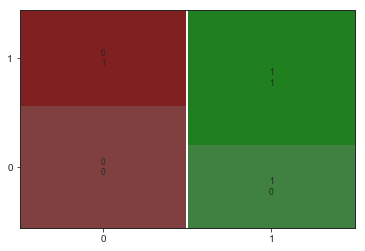

In [223]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

## Measuring logistic model performance


<p>As you know by now, several metrics exist for measuring the performance of a logistic regression model. In this last exercise, you'll manually calculate accuracy, sensitivity, and specificity. Recall the following definitions:</p>
<p><em>Accuracy</em> is the proportion of predictions that are correct.
<mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" display="true" role="presentation" tabindex="0" ctxtmenu_counter="3" style="font-size: 116.7%; position: relative;"><mjx-math display="true" class="MJX-TEX" aria-hidden="true" style="margin-left: 0px; margin-right: 0px;"><mjx-mtext class="mjx-n"><mjx-c class="mjx-c61"></mjx-c><mjx-c class="mjx-c63"></mjx-c><mjx-c class="mjx-c63"></mjx-c><mjx-c class="mjx-c75"></mjx-c><mjx-c class="mjx-c72"></mjx-c><mjx-c class="mjx-c61"></mjx-c><mjx-c class="mjx-c63"></mjx-c><mjx-c class="mjx-c79"></mjx-c></mjx-mtext><mjx-mo class="mjx-n" space="4"><mjx-c class="mjx-c3D"></mjx-c></mjx-mo><mjx-mfrac space="4"><mjx-frac type="d"><mjx-num><mjx-nstrut type="d"></mjx-nstrut><mjx-mrow><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D447 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D441 TEX-I"></mjx-c></mjx-mi><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-c2B"></mjx-c></mjx-mo><mjx-mi class="mjx-i" space="3"><mjx-c class="mjx-c1D447 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D443 TEX-I"></mjx-c></mjx-mi></mjx-mrow></mjx-num><mjx-dbox><mjx-dtable><mjx-line type="d"></mjx-line><mjx-row><mjx-den><mjx-dstrut type="d"></mjx-dstrut><mjx-mrow><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D447 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D441 TEX-I"></mjx-c></mjx-mi><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-c2B"></mjx-c></mjx-mo><mjx-mi class="mjx-i" space="3"><mjx-c class="mjx-c1D439 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D441 TEX-I"></mjx-c></mjx-mi><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-c2B"></mjx-c></mjx-mo><mjx-mi class="mjx-i" space="3"><mjx-c class="mjx-c1D439 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D443 TEX-I"></mjx-c></mjx-mi><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-c2B"></mjx-c></mjx-mo><mjx-mi class="mjx-i" space="3"><mjx-c class="mjx-c1D447 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D443 TEX-I"></mjx-c></mjx-mi></mjx-mrow></mjx-den></mjx-row></mjx-dtable></mjx-dbox></mjx-frac></mjx-mfrac></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="block"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtext>accuracy</mtext><mo>=</mo><mfrac><mrow><mi>T</mi><mi>N</mi><mo>+</mo><mi>T</mi><mi>P</mi></mrow><mrow><mi>T</mi><mi>N</mi><mo>+</mo><mi>F</mi><mi>N</mi><mo>+</mo><mi>F</mi><mi>P</mi><mo>+</mo><mi>T</mi><mi>P</mi></mrow></mfrac></math></mjx-assistive-mml></mjx-container> </p>
<p><em>Sensitivity</em> is the proportion of <em>true</em> observations that are correctly predicted by the model as being <em>true</em>.
<mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" display="true" role="presentation" tabindex="0" ctxtmenu_counter="4" style="font-size: 116.7%; position: relative;"><mjx-math display="true" class="MJX-TEX" aria-hidden="true" style="margin-left: 0px; margin-right: 0px;"><mjx-mtext class="mjx-n"><mjx-c class="mjx-c73"></mjx-c><mjx-c class="mjx-c65"></mjx-c><mjx-c class="mjx-c6E"></mjx-c><mjx-c class="mjx-c73"></mjx-c><mjx-c class="mjx-c69"></mjx-c><mjx-c class="mjx-c74"></mjx-c><mjx-c class="mjx-c69"></mjx-c><mjx-c class="mjx-c76"></mjx-c><mjx-c class="mjx-c69"></mjx-c><mjx-c class="mjx-c74"></mjx-c><mjx-c class="mjx-c79"></mjx-c></mjx-mtext><mjx-mo class="mjx-n" space="4"><mjx-c class="mjx-c3D"></mjx-c></mjx-mo><mjx-mfrac space="4"><mjx-frac type="d"><mjx-num><mjx-nstrut type="d"></mjx-nstrut><mjx-mrow><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D447 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D443 TEX-I"></mjx-c></mjx-mi></mjx-mrow></mjx-num><mjx-dbox><mjx-dtable><mjx-line type="d"></mjx-line><mjx-row><mjx-den><mjx-dstrut type="d"></mjx-dstrut><mjx-mrow><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D447 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D443 TEX-I"></mjx-c></mjx-mi><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-c2B"></mjx-c></mjx-mo><mjx-mi class="mjx-i" space="3"><mjx-c class="mjx-c1D439 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D441 TEX-I"></mjx-c></mjx-mi></mjx-mrow></mjx-den></mjx-row></mjx-dtable></mjx-dbox></mjx-frac></mjx-mfrac></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="block"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtext>sensitivity</mtext><mo>=</mo><mfrac><mrow><mi>T</mi><mi>P</mi></mrow><mrow><mi>T</mi><mi>P</mi><mo>+</mo><mi>F</mi><mi>N</mi></mrow></mfrac></math></mjx-assistive-mml></mjx-container></p>
<p><em>Specificity</em> is the proportion of <em>false</em> observations that are correctly predicted by the model as being <em>false</em>.
<mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" display="true" role="presentation" tabindex="0" ctxtmenu_counter="5" style="font-size: 116.7%; position: relative;"><mjx-math display="true" class="MJX-TEX" aria-hidden="true" style="margin-left: 0px; margin-right: 0px;"><mjx-mtext class="mjx-n"><mjx-c class="mjx-c73"></mjx-c><mjx-c class="mjx-c70"></mjx-c><mjx-c class="mjx-c65"></mjx-c><mjx-c class="mjx-c63"></mjx-c><mjx-c class="mjx-c69"></mjx-c><mjx-c class="mjx-c66"></mjx-c><mjx-c class="mjx-c69"></mjx-c><mjx-c class="mjx-c63"></mjx-c><mjx-c class="mjx-c69"></mjx-c><mjx-c class="mjx-c74"></mjx-c><mjx-c class="mjx-c79"></mjx-c></mjx-mtext><mjx-mo class="mjx-n" space="4"><mjx-c class="mjx-c3D"></mjx-c></mjx-mo><mjx-mfrac space="4"><mjx-frac type="d"><mjx-num><mjx-nstrut type="d"></mjx-nstrut><mjx-mrow><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D447 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D441 TEX-I"></mjx-c></mjx-mi></mjx-mrow></mjx-num><mjx-dbox><mjx-dtable><mjx-line type="d"></mjx-line><mjx-row><mjx-den><mjx-dstrut type="d"></mjx-dstrut><mjx-mrow><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D447 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D441 TEX-I"></mjx-c></mjx-mi><mjx-mo class="mjx-n" space="3"><mjx-c class="mjx-c2B"></mjx-c></mjx-mo><mjx-mi class="mjx-i" space="3"><mjx-c class="mjx-c1D439 TEX-I"></mjx-c></mjx-mi><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D443 TEX-I"></mjx-c></mjx-mi></mjx-mrow></mjx-den></mjx-row></mjx-dtable></mjx-dbox></mjx-frac></mjx-mfrac></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="block"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtext>specificity</mtext><mo>=</mo><mfrac><mrow><mi>T</mi><mi>N</mi></mrow><mrow><mi>T</mi><mi>N</mi><mo>+</mo><mi>F</mi><mi>P</mi></mrow></mfrac></math></mjx-assistive-mml></mjx-container></p>
<p><code>churn</code>, <code>mdl_churn_vs_relationship</code>, and <code>conf_matrix</code> are available.</p>

Extract the number of true positives (<code>TP</code>), true negatives (<code>TN</code>), false positives (<code>FP</code>), and false negatives (<code>FN</code>) from <code>conf_matrix</code>.

In [224]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
TP = conf_matrix[1,1]

Calculate the <code>accuracy</code> of the model.

In [225]:

# Calculate and print the accuracy
accuracy = (TP+TN) / (TN + TP +FN+FP)
print("accuracy: ", accuracy)

accuracy:  0.59


Calculate the <code>sensitivity</code> of the model.

In [226]:

# Calculate and print the sensitivity
sensitivity = TP / (FN+TP)
print("sensitivity: ", sensitivity)

sensitivity:  0.62


Calculate the <code>specificity</code> of the model.

In [227]:

# Calculate and print the specificity
specificity = TN / (TN +FP)
print("specificity: ", specificity)

specificity:  0.56
